In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
from scipy import linalg
import itertools
from tqdm import tqdm

# Возмущенные уравнения движения ЛА

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [40]:
# Як - 52
# Cy0 = 4.81
# Cya = 4.81
# Cx0 = 0.0375
# B = 0.062
# S = 15
# M = 1000
# b = 1.64

# Як - 55
# Cy0 = 0
# Cya = 4.3
# Cx0 = 0.035
# B = 0.07

# rho = 1.2
# S = 14.805
# M = 1000
# b = 1.746


# # # Jz = 1550  #!!!???
# # # mza = 600  #!!!???
# # # mzs = 900  #!!!???

# Jz = 5000
# mza = 0.005
# mzs = 0.003

# g = 9.8



V_prog = 50 # 300
alpha_prog = -0.2
theta_prog = -0.3
P_prog = 0
sigma_prog = 0


# Як - 55
Cy0 = 0
Cya = 4.3
Cx0 = 0.035
B = 0.07

rho = 1.2
S = 14.805
M = 1000
b = 1.746


Jz = 2000
mza = 1500
mzs = 2300

g = 9.8

In [87]:
# Определение параметров самолета и условий полета
M = 1000  # Масса ЛА (кг)
S = 14.805  # Площадь поверхности крыла (кв. м)
b = 1.746  # Расстояние от ц.м. до центра давления ЛА (м)
g = 9.81  # Ускорение свободного падения (м/с^2)
Jz = 2000  # Момент инерции корпуса ЛА относительно оси z (кг*м^2)
rho = 1.225  # Плотность воздуха (кг/м^3)

# Определение аэродинамических коэффициентов
c0x = 0.035
c0y = 0
c_alpha_y = 4.3
B = 0.07
m_alpha_z = 1500
m_sigma_z = 2300


# Определение начальных условий
V0 = 50  # Начальная скорость (м/с)
theta0 = 0  # Начальный траекторный угол (рад)
phi0 = 0  # Начальный угол тангажа (рад)
Omega0 = 0  # Начальная абсолютная угловая скорость (рад/с)
initial_state = [V0, theta0, phi0, Omega0]

# Определение времени моделирования и шага интегрирования
t_start = 0
t_end = 30
dt = 0.001
t_span = (t_start, t_end)



In [88]:
# Определение функций изменения параметров со временем
def delta_V(t):
    # изменение скорости со временем
    return 0.01 * np.sin(0.1 * t)

def delta_alpha(t):
    # изменение угла атаки со временем
    return 0.01 * np.sin(0.2 * t)

def sigma(t):
    # изменение отклонения руля высоты со временем
    return 0.05 * np.sin(0.5 * t)


# Определение изменения силы тяги со временем
def P(t):
    # сила тяги линейно 
    return 0.1 * np.sin(0.1 * t)



# Определение функции правых частей системы дифференциальных уравнений
def equations_of_motion(t, state):
    V, theta, phi, Omega = state
    alpha = phi - theta  # Угол атаки
    delta_alpha_val = delta_alpha(t)
    delta_V_val = delta_V(t)
    sigma_val = sigma(t)
    X = 0.5 * rho * (V + delta_V_val)**2 * S * (c0x + B * (c0y + c_alpha_y * (alpha + delta_alpha_val))**2)
    Y = 0.5 * rho * (V + delta_V_val)**2 * S * (c0y + c_alpha_y * (alpha + delta_alpha_val))
    Mz = -0.5 * rho * (V + delta_V_val)**2 * S * b * (m_alpha_z * (alpha + delta_alpha_val) + m_sigma_z * sigma_val)
    
    dVdt = (-M * g * np.sin(theta) + P(t) * np.cos(alpha) - X) / M
    dthetadt = (P(t) * np.sin(alpha) + Y) / (M * V)
    dphidt = Omega
    dOmegadt = -Mz / Jz
    
    return [dVdt, dthetadt, dphidt, dOmegadt]

In [89]:
# Решение системы дифференциальных уравнений
solution = solve_ivp(equations_of_motion, t_span, initial_state, t_eval=np.arange(t_start, t_end, dt))

# Визуализация результатов
# t_values = solution.t
V_values, theta_values, phi_values, Omega_values = solution.y
t_values = np.linspace(0, t_end, len(V_values)) #solution.t


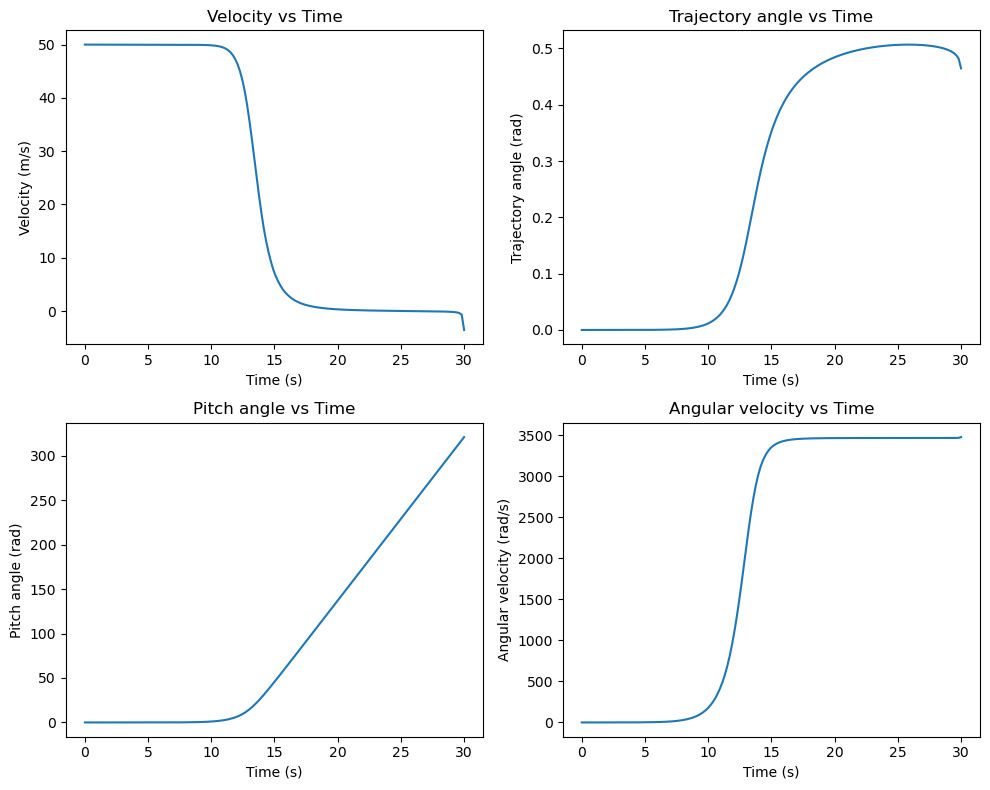

In [90]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(t_values, V_values)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')

plt.subplot(2, 2, 2)
plt.plot(t_values, theta_values)
plt.xlabel('Time (s)')
plt.ylabel('Trajectory angle (rad)')
plt.title('Trajectory angle vs Time')

plt.subplot(2, 2, 3)
plt.plot(t_values, phi_values)
plt.xlabel('Time (s)')
plt.ylabel('Pitch angle (rad)')
plt.title('Pitch angle vs Time')

plt.subplot(2, 2, 4)
plt.plot(t_values, Omega_values)
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Angular velocity vs Time')

plt.tight_layout()
plt.show()

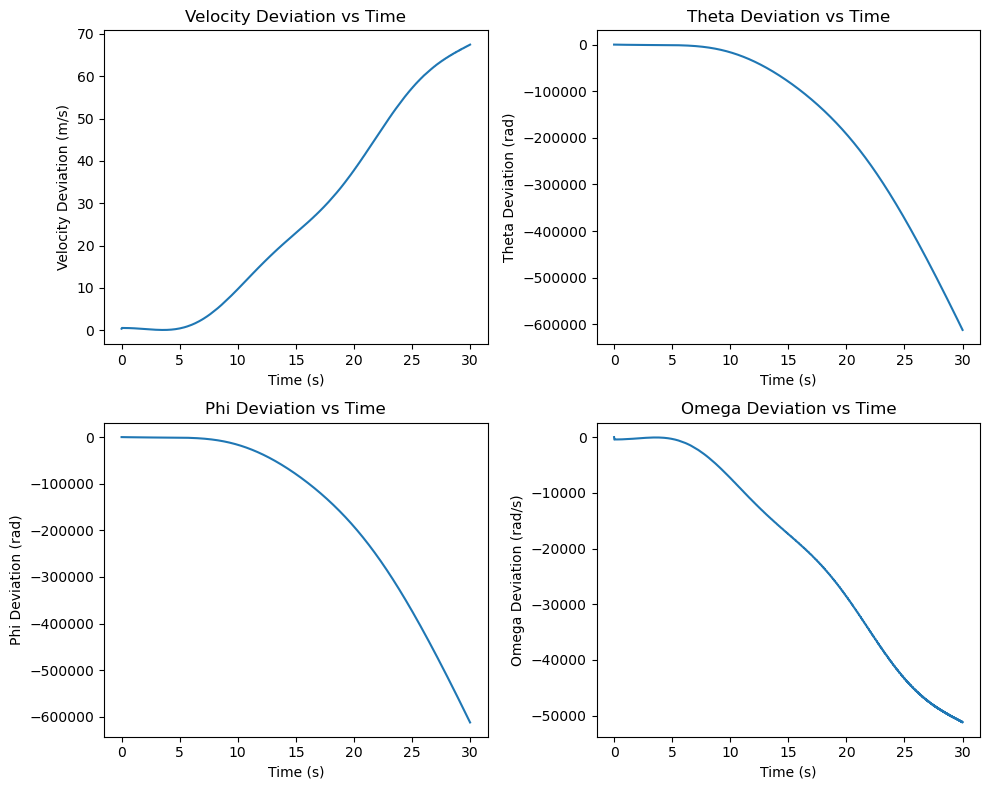

In [91]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Определение функции правых частей линеаризованной системы
def linearized_equations_of_motion(t, state):
    return matrix_A @ state + matrix_B @ np.array([Delta_P(t), Delta_sigma(t)]) + matrix_C @ np.array([delta_V(t), delta_alpha(t)])

# Определение изменения управления со временем
def Delta_P(t):
    # изменение силы тяги со временем
    return 0.1 * np.sin(0.1 * t)

def Delta_sigma(t):
    # изменение отклонения руля высоты со временем
    return 0.05 * np.sin(0.5 * t)

# Определение изменения возмущений со временем
def delta_V(t):
    #  изменение скорости со временем
    return 0.01 * np.sin(0.1 * t)

def delta_alpha(t):
    #  изменение угла атаки со временем
    return 0.01 * np.sin(0.2 * t)



# Заполнение матриц коэффициентов
P_star = 0
V_star = 50
alpha_star = 0
theta_star = 0




# Определение параметров самолета и условий полета
M = 1000  # Масса ЛА (кг)
S = 14.805  # Площадь поверхности крыла (кв. м)
b = 1.746  # Расстояние от ц.м. до центра давления ЛА (м)
g = 9.81  # Ускорение свободного падения (м/с^2)
Jz = 2000  # Момент инерции корпуса ЛА относительно оси z (кг*м^2)
# Jz = 250
rho = 1.225  # Плотность воздуха (кг/м^3)

# Определение аэродинамических коэффициентов
c0x = 0.035
c0y = 0
c_alpha_y = 4.3
B = 0.07
m_alpha_z = 1500
m_sigma_z = 2300



#================================
V_prog = 50 # 300
alpha_prog = -0.2
theta_prog = -0.3
P_prog = 0
sigma_prog = 0



# Як - 55
Cy0 = 0
Cya = 4.3
Cx0 = 0.035
B = 0.07

rho = 1.2
S = 14.805
M = 1000
b = 1.746


Jz = 2000
mza = 1500
mzs = 2300

g = 9.8

a11 = -rho*S*V_prog*(Cx0 + B*(Cy0**2) +2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
a12 = (P_prog*np.cos(alpha_prog) + rho*B*S*Cya*(V_prog**2)*(Cy0 + Cya*alpha_prog)) / M
a13 = -a12

a21 = (rho*S*V_prog*(Cy0 + Cya*alpha_prog) + M*g*np.cos(theta_prog) / (V_prog**2))
a22 = -(rho*S*Cya*(V_prog**2) + P_prog*np.cos(alpha_prog) / V_prog) / M
a23 = -a22

a41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog) / Jz
a42 = 0.5*rho*S*b*mza*(V_prog**2) / Jz
a43 = -a42

matrix_A = np.array([[a11, a12, a13, 0.],
              [a21, a22, a23, 0.],
              [0., 0., 0., 1.],
              [a41, a42, a43, 0.]])

b11 = np.cos(alpha_prog) / M
b21 = np.sin(alpha_prog) / (M * V_prog)
b42 = -0.5*rho*S*mzs*(V_prog**2) / Jz


matrix_B = np.array([[b11, 0.],
              [b21, 0.],
              [0., 0.],
              [0., b42]])



c11 = rho*S*V_prog*(Cx0 + B*(Cy0**2) + 2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    
c12 = rho*B*S*(V_prog**2)*Cya*(Cy0 + Cya*alpha_prog) / M

c21 = -rho*S*V_prog*(Cy0 + Cya*alpha_prog) / M

c22 = -0.5*rho*S*Cya*(V_prog**2) / M

c41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog)

c42 = -0.5*rho*b*S*mza*(V_prog**2) / Jz

matrix_C = np.array([[c11, c12],
              [c21, c22],
              [0., 0.],
              [c41, c42]])



# Определение начальных условий
# x0 = np.array([0, 0, 0, 0])  # Начальное состояние системы в отклонениях
x0 = np.random.random(4)


# Определение времени моделирования
t_start = 0
t_end = 30
dt = 0.001
t_span = (t_start, t_end)

# Решение системы дифференциальных уравнений
solution_linearized = solve_ivp(linearized_equations_of_motion, t_span, x0, t_eval=np.arange(t_start, t_end, dt))

# Визуализация результатов
# t_values_linearized = solution_linearized.t
x_values, theta_values, phi_values, Omega_values = solution_linearized.y
t_values_linearized = np.linspace(0, t_end, len(x_values))



plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(t_values_linearized, x_values)
plt.xlabel('Time (s)')
plt.ylabel('Velocity Deviation (m/s)')
plt.title('Velocity Deviation vs Time')

# plt.ylim(-1000, 1000)



plt.subplot(2, 2, 2)
plt.plot(t_values_linearized, theta_values)
plt.xlabel('Time (s)')
plt.ylabel('Theta Deviation (rad)')
plt.title('Theta Deviation vs Time')

# plt.ylim(-1000, 1000)


plt.subplot(2, 2, 3)
plt.plot(t_values_linearized, phi_values)
plt.xlabel('Time (s)')
plt.ylabel('Phi Deviation (rad)')
plt.title('Phi Deviation vs Time')

# plt.ylim(-1000, 1000)
# plt.xlim(0, 0.01)

plt.subplot(2, 2, 4)
plt.plot(t_values_linearized, Omega_values)
plt.xlabel('Time (s)')
plt.ylabel('Omega Deviation (rad/s)')
plt.title('Omega Deviation vs Time')

# plt.ylim(-1000, 1000)


plt.tight_layout()
plt.show()


Self made !!!!!!!!!!!!!!

In [39]:
# Як - 52
# Cy0 = 4.81
# Cya = 4.81
# Cx0 = 0.0375
# B = 0.062
# S = 15
# M = 1000
# b = 1.64

# Як - 55
Cy0 = 0
Cya = 4.3
Cx0 = 0.035
B = 0.07

rho = 1.2
S = 14.805
M = 800
b = 1.746


# Jz = 1550  #!!!???
# mza = 600  #!!!???
# mzs = 900  #!!!???

Jz = 5000
mza = 0.005
mzs = 0.003

g = 9.8

#=================================
# ChatGPT

# Параметры самолета (можно настроить под Як-55 или Як-52)
# M = 1000  # масса самолета, кг
# S = 15  # площадь поверхности крыла, м^2
# b = 2  # расстояние от ц.м. до центра давления ЛА, м
# Jz = 5000  # момент инерции корпуса ЛА относительно оси z, кг*м^2
# c0x = 0.2  # безразмерные коэффициенты (характеристики ЛА)
# c0y = 0.1
# c_alpha_y = 0.05
# B = 0.05
# m_alpha_z = 0.02
# m_sigma_z = 0.01

In [27]:
def disturbance(t):
    """
    Возмущения ветра
    """
    dV = 5*np.sin(5*t)
    dalpha = 1.5*np.sin(t)
    
    return np.array([dV, dalpha])
    # return np.array([0., 0.])

In [28]:
def control(t):
    dP = -5*np.sin(5*t)
    dsigma = -1.5*np.sin(t)
    
    return np.array([dP, dsigma])
    # return np.array([0., 0.])
    # return np.array([-0.5*x[0], -0.5*x[1]])

In [29]:
def nonlinear_airplane(x, t, Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g):
    P, sigma = control(t)
    dV, dalpha = disturbance(t)
    # alpha = phi - theta
    alpha = x[2] - x[1] 
    
    a = (-M*g*np.sin(x[1]) + P*np.cos(alpha) - 0.5*rho*((x[0] + dV)**2)*S*(Cx0 + B*(Cy0 + Cya*((alpha + dalpha)**2)))) / M
    b = (-M*g*np.cos(x[1])/x[0] + P*np.sin(alpha)/x[0] + 0.5*rho*S*((x[0] + dV)**2)*(Cy0 + Cya*((alpha + dalpha)**2))/x[0]) / M
    c = x[3]
    d = -0.5*rho*S*b*((x[0] + dV)**2)*(mza*(alpha + dalpha) + mzs*sigma) / Jz
    
    return np.array([a, b, c, d])

In [40]:
x0 = np.array([30, -15, -9, -1])
args_nonlin = (Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g)

t = np.linspace(0, 20, 451)
x = integrate.odeint(nonlinear_airplane, x0, t, args_nonlin)

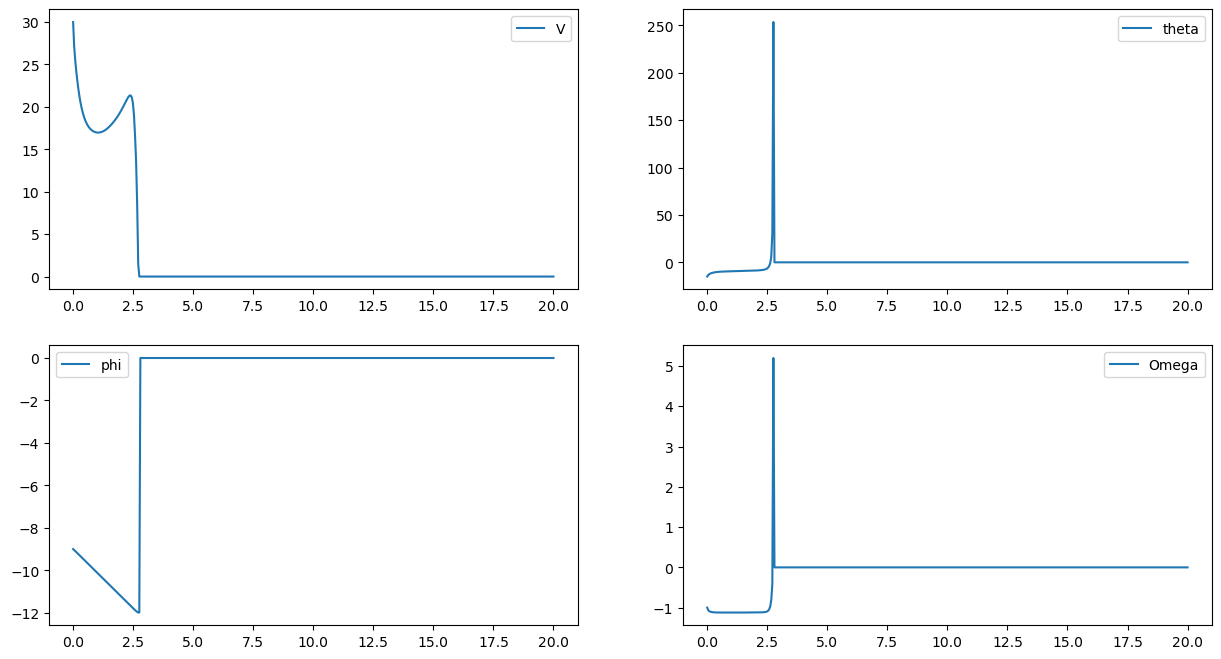

In [41]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x[:, 0], label="V")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, x[:, 1], label="theta")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, x[:, 2], label="phi")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, x[:, 3], label="Omega")
#plt.ylim(-50, 500)
plt.legend()
plt.show()

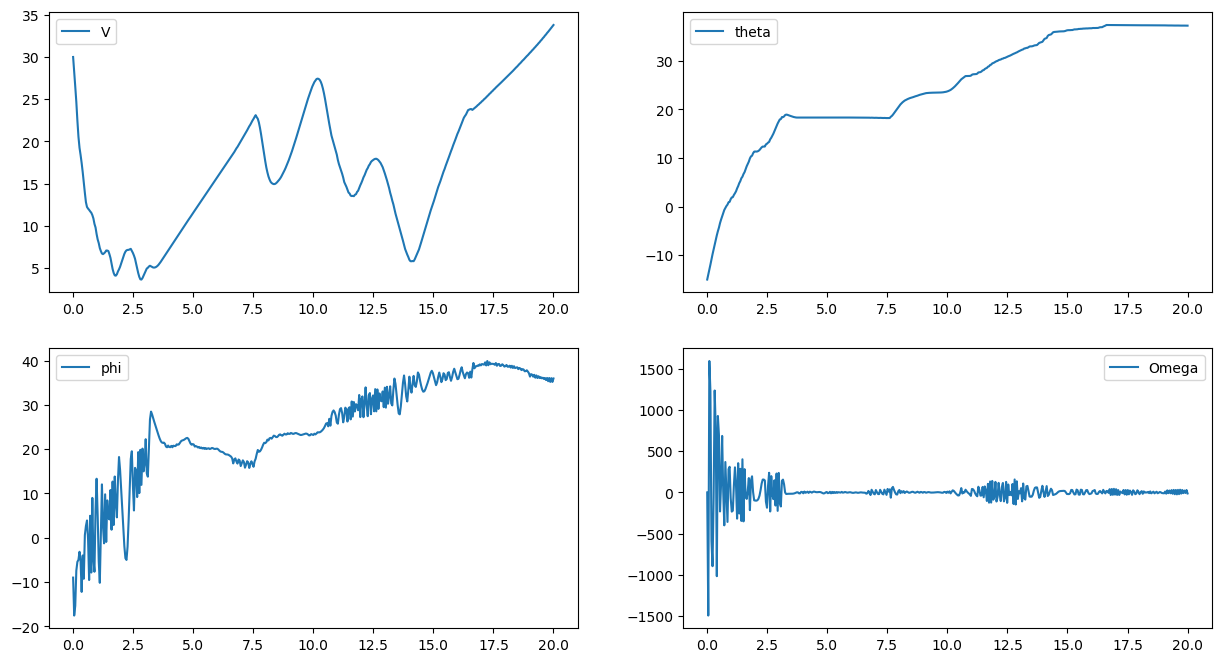

In [7]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x[:, 0], label="V")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, x[:, 1], label="theta")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, x[:, 2], label="phi")
#plt.ylim(0, 500)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, x[:, 3], label="Omega")
#plt.ylim(-50, 500)
plt.legend()
plt.show()

In [32]:
def linear_airplane(x, t, V_prog, alpha_prog, theta_prog, P_prog, sigma_prog,
             Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g):
    """
    dx/dt = Ax + Bu + Cv
    x, u, v - векторы состояния, управления и возмущений в текущий момент времени
    """
    
    a11 = -rho*S*V_prog*(Cx0 + B*(Cy0**2) +2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    a12 = (P_prog*np.cos(alpha_prog) + rho*B*S*Cya*(V_prog**2)*(Cy0 + Cya*alpha_prog)) / M
    a13 = -a12
    
    a21 = (rho*S*V_prog*(Cy0 + Cya*alpha_prog) + M*g*np.cos(theta_prog) / (V_prog**2))
    a22 = -(rho*S*Cya*(V_prog**2) + P_prog*np.cos(alpha_prog) / V_prog) / M
    a23 = -a22
    
    a41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog) / Jz
    a42 = 0.5*rho*S*b*mza*(V_prog**2) / Jz
    a43 = -a42
    
    A = np.array([[a11, a12, a13, 0.],
                  [a21, a22, a23, 0.],
                  [0., 0., 0., 1.],
                  [a41, a42, a43, 0.]])
    
    c11 = rho*S*V_prog*(Cx0 + B*(Cy0**2) + 2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    
    c12 = rho*B*S*(V_prog**2)*Cya*(Cy0 + Cya*alpha_prog) / M
    
    c21 = -rho*S*V_prog*(Cy0 + Cya*alpha_prog) / M
    
    c22 = -0.5*rho*S*Cya*(V_prog**2) / M
    
    c41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog)
    
    c42 = -0.5*rho*b*S*mza*(V_prog**2) / Jz
    
    C = np.array([[c11, c12],
                  [c21, c22],
                  [0., 0.],
                  [c41, c42]]) 
    
    
    b11 = np.cos(alpha_prog) / M
    b21 = np.sin(alpha_prog) / (M * V_prog)
    b42 = -0.5*rho*S*mzs*(V_prog**2) / Jz
    
    
    # !!!!! created B is matrix in equation! But initialy B is a constant parameter!!!!
    B = np.array([[b11, 0.],
                  [b21, 0.],
                  [0., 0.],
                  [0., b42]])
    
    v = disturbance(t)
    u = control(t)
    
    return A@x + B@u + C@v

In [42]:
dx0 = np.array([30, 2, 3, 1])
#dx0 = np.array([0, 0, 0, 0])
dx0 = np.random.random(4) / 100


V_prog = 130
alpha_prog = -5
theta_prog = -15
P_prog = 0
sigma_prog = 0

t = 15

args_lin = (V_prog, alpha_prog, theta_prog, P_prog, sigma_prog,
        Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g)

# airplane(x, t, V_prog, alpha_prog, theta_prog, P_prog, sigma_prog,
#         Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g)

# linear_airplane(dx0, 1.05611222, *args_lin)

In [43]:
t = np.linspace(0, 30, 301)
x = integrate.odeint(linear_airplane, dx0, t, args_lin)

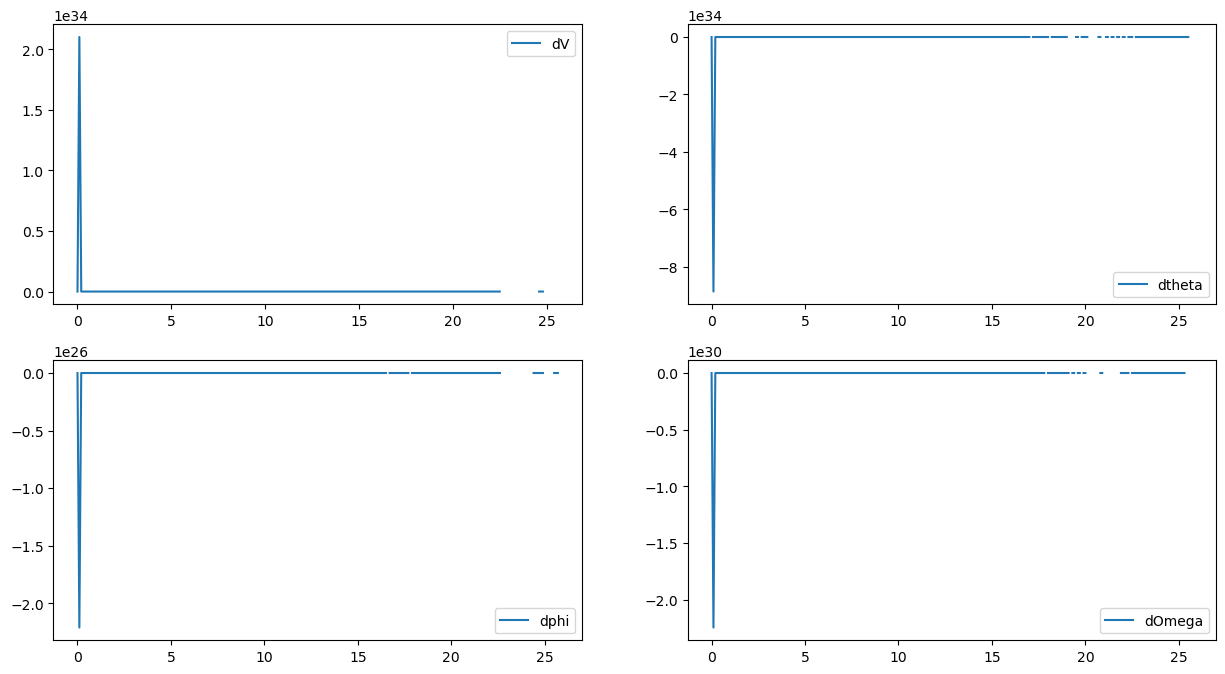

In [44]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x[:, 0], label="dV")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, x[:, 1], label="dtheta")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, x[:, 2], label="dphi")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, x[:, 3], label="dOmega")
plt.legend()
plt.show()

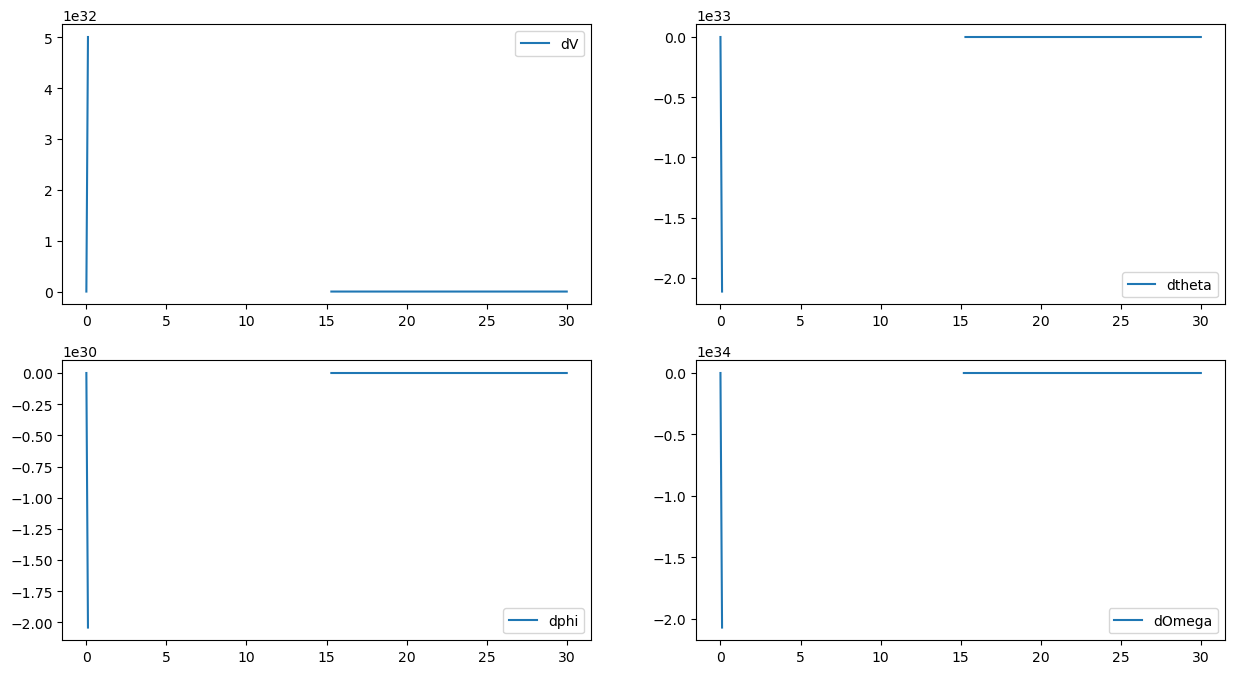

In [34]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(t, x[:, 0], label="dV")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, x[:, 1], label="dtheta")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, x[:, 2], label="dphi")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, x[:, 3], label="dOmega")
plt.legend()
plt.show()

# Область достижимости

In [14]:
from scipy import linalg
import itertools
from tqdm import tqdm

## Скалярные управления и возмущения

In [39]:
def integrate_system_control(A, B, u, z0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(z, t, A, B, u):
        # return A@z - B@u.get_control(t)
        return A@z - B*u.get_control(t)
    
    z = integrate.odeint(right_side, z0, T, args=(A, B, u))
    
    return z

In [40]:
def integrate_system_disturbance(A, C, v, y0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(y, t, A, C, v):
        # return A@y + C@v.get_disturbance(t)
        return A@y + C*v.get_disturbance(t)
    
    y = integrate.odeint(right_side, y0, T, args=(A, C, v))
    
    return y

In [62]:
class Psi:
    def __init__(self, A, c,
                 tk
                ):
        self.A = A
        self.c = c
        self.tk = tk
    
    def exponential_matrix(self, matrix, t):
        
        res = linalg.expm(matrix*t)
        
        # res = np.eye(matrix.shape[0]) + t*matrix + 0.5*(t**2)*(matrix@matrix) + (t**3)*(matrix@matrix)@matrix/6

        return res
    
    def func(self, t):
        exp_mat = self.exponential_matrix(self.A, self.tk - t)
        
        return np.dot(exp_mat, self.c)

In [56]:
class Control:
    def __init__(self, Psi, power_min, power_max, matrix_B):
        self.Psi = Psi
        self.power_min = power_min
        self.power_max = power_max
        self.matrix_B = matrix_B
      
    
    def get_control(self, t):
        psi_t = self.Psi.func(t) 
        
        if psi_t@self.matrix_B <= 0:
            power = self.power_max
        else:
            power = self.power_min
       
        return power

In [57]:
class Disturbance:
    def __init__(self, Psi, v1_min, v1_max,  martirx_C):
        self.Psi = Psi
        self.v1_min = v1_min
        self.v1_max = v1_max
        self.matrix_C = matrix_C
      
    def get_disturbance(self, t):
        psi = self.Psi.func(t)
        
        if psi@matrix_C <= 0:
            v1 = self.v1_max
        else:
            v1 = self.v1_min
            
        return v1

In [70]:
def find_minmax(control_domain, disturbance_domain):
    # поиск минимакса 

    list_y_max_distance = []
    list_max_distance = []

    for z in control_domain:

        max_distance = -np.inf
        y_max_distance = disturbance_domain[0]

        for y in disturbance_domain:
            distance = np.linalg.norm(y - z)

            if distance > max_distance:
                max_distance = distance
                y_max_distance = y

        list_y_max_distance.append(y_max_distance)
        list_max_distance.append(max_distance)

    idx_minmax = np.argmin(list_max_distance)

    minmax = list_max_distance[idx_minmax]

    saddle_point_minmax = np.array([control_domain[idx_minmax], list_y_max_distance[idx_minmax]])
    
    return minmax, saddle_point_minmax

In [71]:
def find_maxmin(control_domain, disturbance_domain):
    # поиск максимина

    list_z_min_distance = []
    list_min_distance = []

    for y in disturbance_domain:

        min_distance = np.inf
        z_min_distance = control_domain[0]

        for z in control_domain:
            distance = np.linalg.norm(y - z)

            if distance < min_distance:
                min_distance = distance
                z_min_distance = z

        list_z_min_distance.append(z_min_distance)
        list_min_distance.append(min_distance)

    idx_maxmin = np.argmax(list_min_distance)

    maxmin = list_min_distance[idx_maxmin]

    saddle_point_maxmin = np.array([list_z_min_distance[idx_maxmin], disturbance_domain[idx_maxmin]])
    
    return maxmin, saddle_point_maxmin

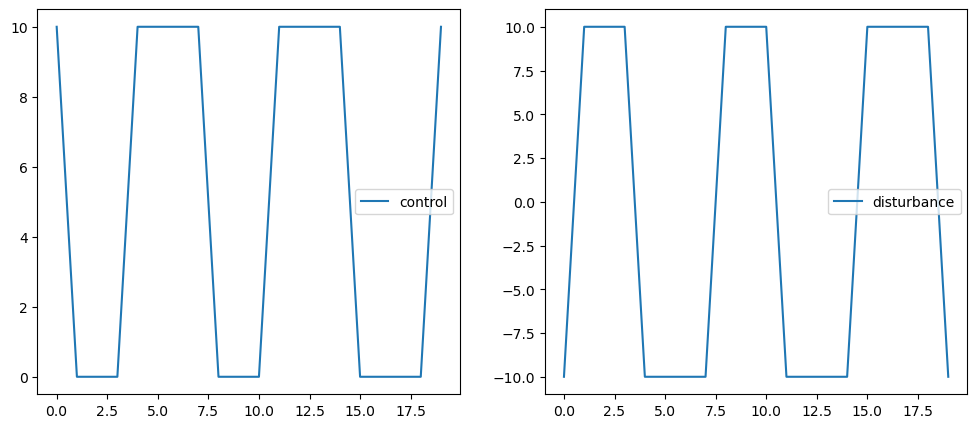

In [59]:
matrix_A = np.array([[0, 1],
                     [-1, -1]])

matrix_B = np.array([-1, 1])

matrix_C = np.array([1, -1])


tk = 20
y0 = np.array([0.2, -0.3]) 

vector_c = np.array([0.5, -0.5]) 
#vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)


function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )
values_psi = np.array([function_psi.func(t_cur) for t_cur in range(0, tk)])


function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                   # v2_min= -3, v2_max=3,
                                   martirx_C=matrix_C)
values_disturbance = np.array([function_disturbance.get_disturbance(t_cur) for t_cur in range(0, tk)])

function_control = Control(function_psi, power_min=0, power_max=10,
                           # sigma_min= -3, sigma_max=3,
                           matrix_B = matrix_B)
values_control = np.array([function_control.get_control(t_cur) for t_cur in range(0, tk)])


fig = plt.figure(figsize=(12,5))

fig.add_subplot(1, 2, 1)
plt.plot(np.arange(len(values_control)), values_control, label="control")
plt.legend()


fig.add_subplot(1, 2, 2)
plt.plot(np.arange(len(values_disturbance)), values_disturbance, label="disturbance")
plt.legend()


plt.show()

In [61]:
tk = 20
z0 = np.array([0, 0]) 
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 21),
                                                                    np.linspace(-1, 1, 21))])
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=10,
                               # sigma_min= -3, sigma_max=3,
                               matrix_B = matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    
control_domain = np.array(control_domain)


y0 = np.array([5, -3])
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                       #v2_min= -3, v2_max=3,
                                       martirx_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    
disturbance_domain = np.array(disturbance_domain)

C:\Users\Egor\AppData\Local\Temp\ipykernel_10704\2725249824.py:3: RuntimeWarning: invalid value encountered in divide
  grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 21),
100%|████████████████████████████████████████████████| 441/441 [03:45<00:00,  1.96it/s]


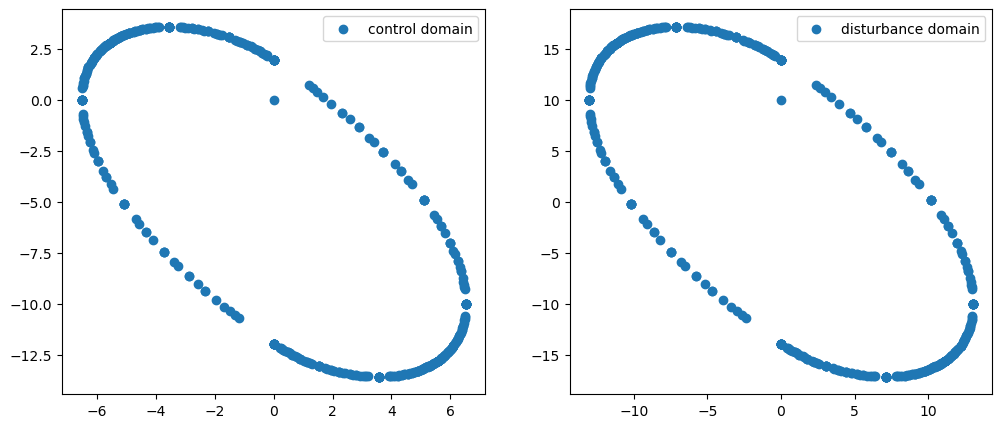

In [62]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(1, 2, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain")
plt.legend()

fig.add_subplot(1, 2, 2)
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain")
plt.legend()

plt.show()

### Колебания маятника с управляемой точкой подвеса

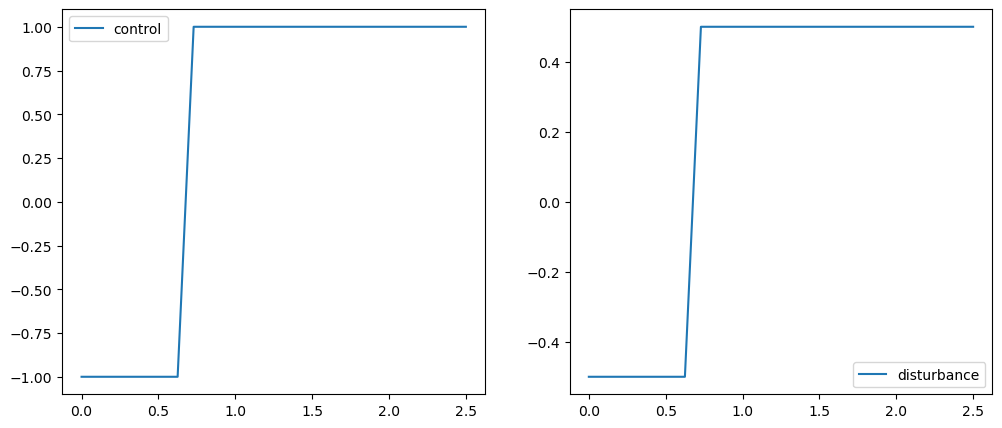

In [67]:
matrix_A = np.array([[1, 1],
                     [-1, 0]])

matrix_B = np.array([0, 1])

matrix_C = np.array([0, 1])


tk = 2.5 # 6
y0 = np.array([-1.5, 2]) 

vector_c = np.array([1, -2]) 
# vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)


function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )
values_psi = np.array([function_psi.func(t_cur) for t_cur in np.linspace(0, tk, int(tk*10))])


function_disturbance = Disturbance(function_psi, v1_min= -0.5, v1_max=0.5,
                                   # v2_min= -3, v2_max=3,
                                   martirx_C=matrix_C)
values_disturbance = np.array([function_disturbance.get_disturbance(t_cur) for t_cur in np.linspace(0, tk, int(tk*10))])

function_control = Control(function_psi, power_min=-1, power_max=1,
                           # sigma_min= -3, sigma_max=3,
                           matrix_B = matrix_B)
values_control = np.array([function_control.get_control(t_cur) for t_cur in np.linspace(0, tk, int(tk*10))])


fig = plt.figure(figsize=(12,5))

fig.add_subplot(1, 2, 1)
plt.plot(np.linspace(0, tk, int(tk*10)), values_control, label="control")
plt.legend()


fig.add_subplot(1, 2, 2)
plt.plot(np.linspace(0, tk, int(tk*10)), values_disturbance, label="disturbance")
plt.legend()


plt.show()

In [68]:
tk = 2.5
z0 = np.array([0, 0]) 
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 21),
                                                                    np.linspace(-1, 1, 21))])
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=-1, power_max=1,
                               # sigma_min= -3, sigma_max=3,
                               matrix_B = matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    
control_domain = np.array(control_domain)


y0 = np.array([-1.5, 2])
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -0.5, v1_max= 0.5,
                                       #v2_min= -3, v2_max=3,
                                       martirx_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    
disturbance_domain = np.array(disturbance_domain)

C:\Users\Egor\AppData\Local\Temp\ipykernel_8908\3007885139.py:3: RuntimeWarning: invalid value encountered in divide
  grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 21),
100%|████████████████████████████████████████████████████████████████████████████████| 441/441 [00:30<00:00, 14.59it/s]


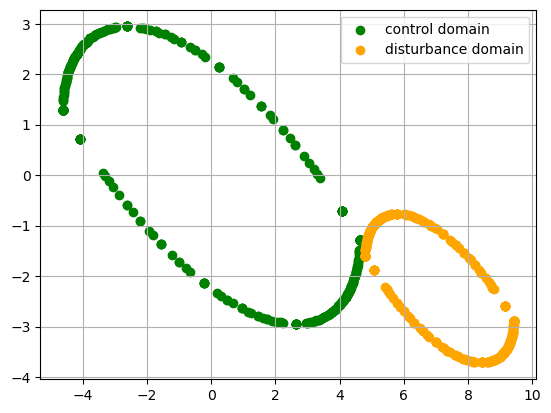

In [69]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")
plt.grid()
plt.legend()
plt.show()

### Поиск седловой точки

In [72]:
minmax, saddle_point_minmax = find_minmax(control_domain, disturbance_domain)
maxmin, saddle_point_maxmin = find_maxmin(control_domain, disturbance_domain)

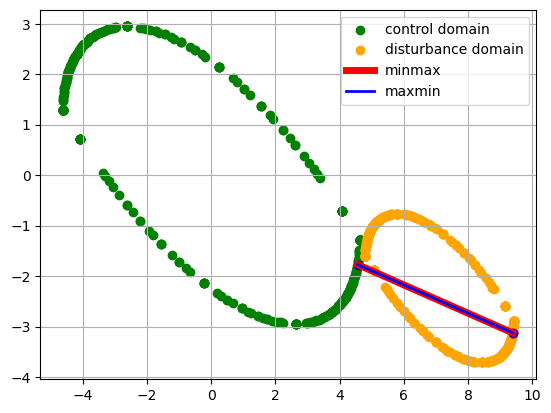

In [73]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][1], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][1], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         color="red", label="minmax", linewidth=5)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][1], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][1], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend()
plt.show()

## Двумерные управления и возмущения

In [15]:
def integrate_system_control(A, B, u, z0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(z, t, A, B, u):
        return A@z - B@u.get_control(t)
        # return A@z - B*u.get_control(t)
    
    z = integrate.odeint(right_side, z0, T, args=(A, B, u))
    
    return z

In [16]:
def integrate_system_disturbance(A, C, v, y0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(y, t, A, C, v):
        return A@y + C@v.get_disturbance(t)
        # return A@y + C*v.get_disturbance(t)
    
    y = integrate.odeint(right_side, y0, T, args=(A, C, v))
    
    return y

In [17]:
class Psi:
    def __init__(self, A, c,
                 tk
                ):
        self.A = A
        self.c = c
        self.tk = tk
    
    def exponential_matrix(self, matrix, t):
        
        # res = linalg.expm(matrix*t)
        # res = np.eye(matrix.shape[0]) + t*matrix + 0.5*(t**2)*(matrix@matrix) + (t**3)*(matrix@matrix)@matrix/6
        
        res = np.eye(matrix.shape[0])
        factorial = 1
        matrix_power_i = matrix
        
        for i in range(1, 7):
            res += (t**i) * matrix_power_i / factorial
            matrix_power_i = matrix_power_i @ matrix
            factorial *= i+1
            
        return res
    
    def func(self, t):
        exp_mat = self.exponential_matrix(self.A.T, self.tk - t)
        
        return np.dot(exp_mat, self.c)

In [18]:
class Control:
    def __init__(self, Psi, power_min, power_max, sigma_min, sigma_max, matrix_B):
        self.Psi = Psi
        self.power_min = power_min
        self.power_max = power_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.matrix_B = matrix_B
      
    
    def get_control(self, t):
        psi_t = self.Psi.func(t) 
        
        if psi_t@self.matrix_B[:, 0] < 0:
            power = self.power_max
        else:
            power = self.power_min
        
        if psi_t@self.matrix_B[:, 1] < 0:
            sigma = self.sigma_max
        else:
            sigma = self.sigma_min
            
        return np.array([power, sigma])

In [19]:
class Disturbance:
    def __init__(self, Psi, v1_min, v1_max, v2_min, v2_max, matrix_C):
        self.Psi = Psi
        self.v1_min = v1_min
        self.v1_max = v1_max
        self.v2_min = v2_min
        self.v2_max = v2_max
        self.matrix_C = matrix_C

    
    def get_disturbance(self, t):
        psi = self.Psi.func(t)
        
        if psi@matrix_C[:, 0] < 0:
            v1 = self.v1_max
        else:
            v1 = self.v1_min
        
        if psi@matrix_C[:, 1] < 0:
            v2 = self.v2_max
        else:
            v2 = self.v2_min
            
        return np.array([v1, v2])

In [20]:
def get_attainability_domains(tk, z0, y0, grid_c, matrix_A, matrix_B, matrix_C,
                              u1_min, u1_max, u2_min, u2_max, v1_min, v1_max, v2_min, v2_max):
    
    control_domain = []

    for vector_c in tqdm(grid_c):
        function_psi = Psi(matrix_A,
                       vector_c, 
                       tk
                      )

        function_control = Control(function_psi, power_min=u1_min, power_max=u1_max,
                                   sigma_min= u2_min, sigma_max=u2_max,
                                   matrix_B = matrix_B)
        z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
        control_domain.append(z[-1])

    control_domain = np.array(control_domain)


    disturbance_domain = []

    for vector_c in tqdm(grid_c):
        function_psi = Psi(matrix_A,
                       vector_c, 
                       tk
                      )

        function_disturbance = Disturbance(function_psi, v1_min= v1_min, v1_max=v1_max,
                                           v2_min= v2_min, v2_max=v2_max,
                                           matrix_C=matrix_C)
        y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
        disturbance_domain.append(y[-1])

    disturbance_domain = np.array(disturbance_domain)
    
    return control_domain, disturbance_domain

In [21]:
def find_minmax(control_domain, disturbance_domain):
    # поиск минимакса 

    list_y_max_distance = []
    list_max_distance = []

    for z in control_domain:

        max_distance = -np.inf
        y_max_distance = disturbance_domain[0]

        for y in disturbance_domain:
            distance = np.linalg.norm(y - z)

            if distance > max_distance:
                max_distance = distance
                y_max_distance = y

        list_y_max_distance.append(y_max_distance)
        list_max_distance.append(max_distance)

    idx_minmax = np.argmin(list_max_distance)

    minmax = list_max_distance[idx_minmax]

    saddle_point_minmax = np.array([control_domain[idx_minmax], list_y_max_distance[idx_minmax]])
    
    return minmax, saddle_point_minmax

In [22]:
def find_maxmin(control_domain, disturbance_domain):
    # поиск максимина

    list_z_min_distance = []
    list_min_distance = []

    for y in disturbance_domain:

        min_distance = np.inf
        z_min_distance = control_domain[0]

        for z in control_domain:
            distance = np.linalg.norm(y - z)

            if distance < min_distance:
                min_distance = distance
                z_min_distance = z

        list_z_min_distance.append(z_min_distance)
        list_min_distance.append(min_distance)

    idx_maxmin = np.argmax(list_min_distance)

    maxmin = list_min_distance[idx_maxmin]

    saddle_point_maxmin = np.array([list_z_min_distance[idx_maxmin], disturbance_domain[idx_maxmin]])
    
    return maxmin, saddle_point_maxmin

### Седловой точки нет

In [33]:
tk = 4
z0 = np.array([0, 0]) 
y0 = np.array([50, -30])
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 20),
                                                                    np.linspace(-1, 1, 20))])
matrix_A = np.array([[0, 1],
                     [-1, -1]])

matrix_B = np.array([[-1, 1],
                     [1, -2]])

matrix_C = np.array([[1, -1],
                     [-2, 1]])

control_domain, disturbance_domain = get_attainability_domains(tk, z0, y0, grid_c, matrix_A, matrix_B, matrix_C,
                                                              u1_min=0, u1_max=10, u2_min= -3, u2_max=3,
                                                              v1_min= -15, v1_max=15, v2_min= -5, v2_max=5)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:47<00:00,  8.50it/s]


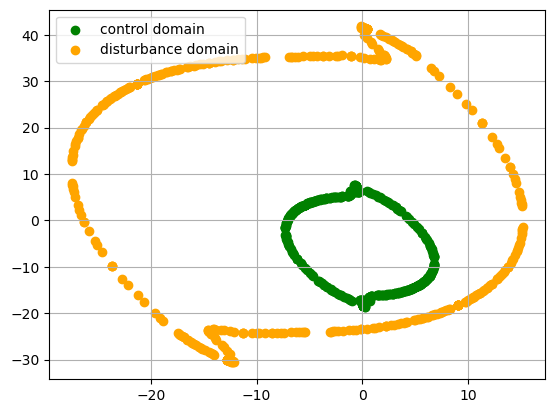

In [34]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")
plt.grid()
plt.legend()
plt.show()

In [35]:
minmax, saddle_point_minmax = find_minmax(control_domain, disturbance_domain)
maxmin, saddle_point_maxmin = find_maxmin(control_domain, disturbance_domain)

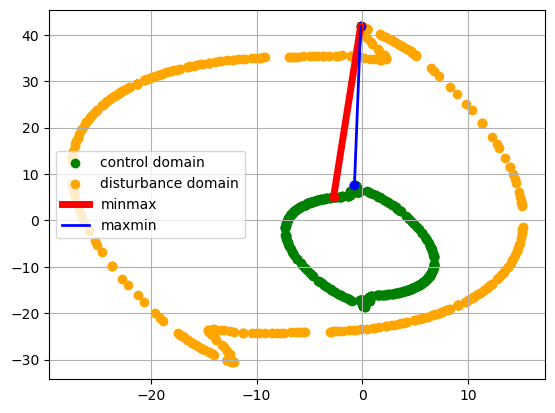

In [36]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][1], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][1], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         color="red", label="minmax", linewidth=5)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][1], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][1], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend()
plt.show()

### Седловая точка - существует

In [77]:
tk = 2
z0 = np.array([0, 0]) 
y0 = np.array([50, -30])
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 20),
                                                                    np.linspace(-1, 1, 20))])
matrix_A = np.array([[0, 1],
                     [-1, -1]])

matrix_B = np.array([[-1, 1],
                     [1, -2]])

matrix_C = np.array([[1, -1],
                     [-2, 1]])

control_domain, disturbance_domain = get_attainability_domains(tk, z0, y0, grid_c, matrix_A, matrix_B, matrix_C,
                                                              u1_min= -4, u1_max=4, u2_min= -1, u2_max=1,
                                                              v1_min= -2, v1_max=2, v2_min= -0.5, v2_max=0.5)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:17<00:00, 22.22it/s]


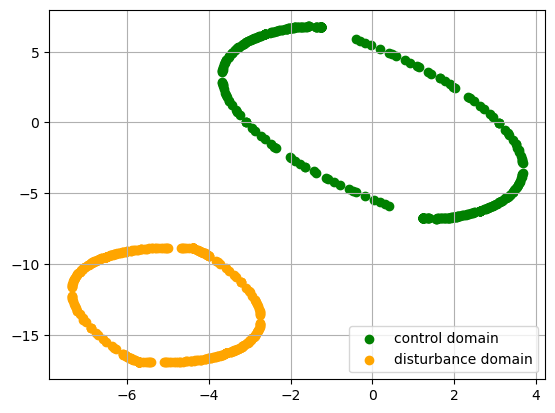

In [78]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")
plt.grid()
plt.legend()
plt.show()

In [79]:
minmax, saddle_point_minmax = find_minmax(control_domain, disturbance_domain)
maxmin, saddle_point_maxmin = find_maxmin(control_domain, disturbance_domain)

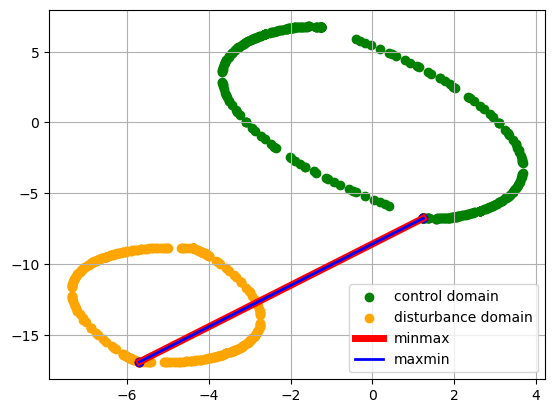

In [82]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][1], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][1], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         color="red", label="minmax", linewidth=5)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][1], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][1], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend()
plt.show()

# !!! проверка алгоритма для двумерной системы!!!1

In [37]:
matrix_A = np.array([[0, 1],
                     [-1, -1]])

matrix_B = np.array([[-1, 1],
                     [1, -2]])

matrix_C = np.array([[1, -1],
                     [-2, 1]])

In [38]:
tk = 2
z0 = np.array([0, 0])
y0 = np.array([50, -30])#*100

grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 20),
                                                                    np.linspace(-1, 1, 20))])    

list_diff_disturbance = []
list_diff_trajectories_disturbance = []
list_diff_vector_c_disturbance = []
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -2, v1_max=2,
                                       v2_min= -0.5, v2_max=0.5,
                                       matrix_C=matrix_C)
    values_disturbance = [function_disturbance.get_disturbance(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_disturbance not in list_diff_disturbance:
        list_diff_disturbance.append(values_disturbance)
        list_diff_vector_c_disturbance.append(vector_c)
    
    
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    y = y.tolist()
    if y not in list_diff_trajectories_disturbance:
        list_diff_trajectories_disturbance.append(y)
    

disturbance_domain = np.array(disturbance_domain)
list_diff_disturbance = np.array(list_diff_disturbance)
list_diff_trajectories_disturbance = np.array(list_diff_trajectories_disturbance)
list_diff_vector_c_disturbance = np.array(list_diff_vector_c_disturbance)
# print(len(list_diff_disturbance))


list_diff_control = []
list_diff_trajectories_control = []
list_diff_vector_c_control = []
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=-4, power_max=4, sigma_min= -1, sigma_max=1,
                                       matrix_B=matrix_B)
    values_control = [function_control.get_control(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_control not in list_diff_control:
        list_diff_control.append(values_control)
        list_diff_vector_c_control.append(vector_c)
    
    
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    z = z.tolist()
    if z not in list_diff_trajectories_control:
        list_diff_trajectories_control.append(z)
    

control_domain = np.array(control_domain)
list_diff_control = np.array(list_diff_control)
list_diff_trajectories_control = np.array(list_diff_trajectories_control)
list_diff_vector_c_control = np.array(list_diff_vector_c_control)
# print(len(list_diff_control))

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:23<00:00, 17.00it/s]


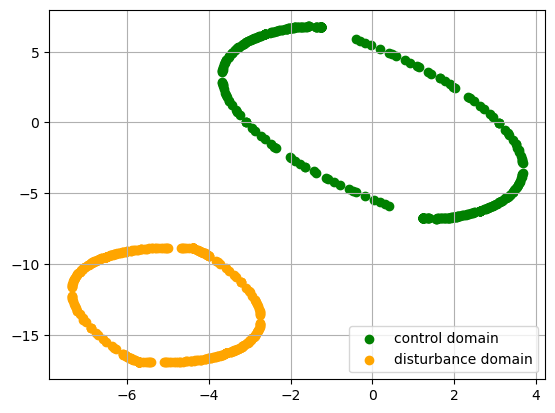

In [39]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")
plt.grid()
plt.legend()
plt.show()

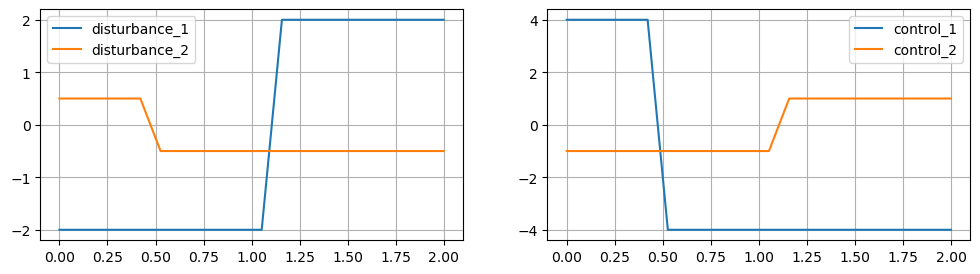

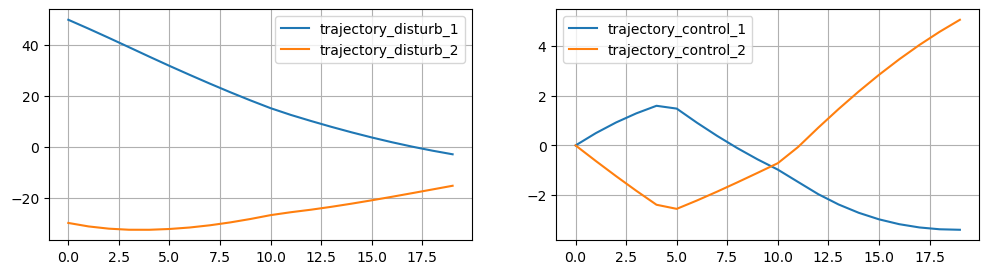

In [56]:
i = 13

fig = plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1)
plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_disturbance[i][:, 0], label="disturbance_1")
plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_disturbance[i][:, 1], label="disturbance_2")
plt.grid()
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_control[i][:, 0], label="control_1")
plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_control[i][:, 1], label="control_2")
plt.grid()
plt.legend()
plt.show()


fig = plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1)
plt.plot(np.arange(len(list_diff_trajectories_disturbance[i])), list_diff_trajectories_disturbance[i][:, 0], label='trajectory_disturb_1')
plt.plot(np.arange(len(list_diff_trajectories_disturbance[i])), list_diff_trajectories_disturbance[i][:, 1], label='trajectory_disturb_2')

# plt.plot(list_diff_trajectories_disturbance[i][:, 0], list_diff_trajectories_disturbance[i][:, 1], label='phase portret disturb')

plt.grid()
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(np.arange(len(list_diff_trajectories_control[i])), list_diff_trajectories_control[i][:, 0], label='trajectory_control_1')
plt.plot(np.arange(len(list_diff_trajectories_control[i])), list_diff_trajectories_control[i][:, 1], label='trajectory_control_2')

# plt.plot(list_diff_trajectories_control[i][:, 0], list_diff_trajectories_control[i][:, 1], label='phase portret control')

plt.grid()
plt.legend()

plt.show()


## система 4 го порядка

In [20]:
def integrate_system_control(A, B, u, z0, tk):
    T = np.linspace(0, tk, tk*10)
    
    def right_side(z, t, A, B, u):
        return A@z - B@u.get_control(t)
        # return A@z - B*u.get_control(t)
    
    z = integrate.odeint(right_side, z0, T, args=(A, B, u))
    
    return z

In [21]:
def integrate_system_disturbance(A, C, v, y0, tk):
    T = np.linspace(0, tk, tk*10)
    
    def right_side(y, t, A, C, v):
        return A@y + C@v.get_disturbance(t)
        # return A@y + C*v.get_disturbance(t)
    
    y = integrate.odeint(right_side, y0, T, args=(A, C, v))
    
    return y

In [23]:
class Psi:
    def __init__(self, A, c,
                 tk
                ):
        self.A = A
        self.c = c
        self.tk = tk
    
    def exponential_matrix(self, matrix, t):
        
        res = linalg.expm(matrix*t)

        return res
    
    def func(self, t):
        exp_mat = self.exponential_matrix(self.A.T, self.tk - t)
        
        return exp_mat@self.c
        #return np.dot(exp_mat, self.c)

In [24]:
class Control:
    def __init__(self, Psi, power_min, power_max, sigma_min, sigma_max, matrix_B):
        self.Psi = Psi
        self.power_min = power_min
        self.power_max = power_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.matrix_B = matrix_B
      
    
    def get_control(self, t):
        psi_t = self.Psi.func(t) 
        
        if psi_t@self.matrix_B[:, 0] < 0:
            power = self.power_max
        else:
            power = self.power_min
        
        if psi_t@self.matrix_B[:, 1] < 0:
            sigma = self.sigma_max
        else:
            sigma = self.sigma_min
            
        return np.array([power, sigma])

In [25]:
class Disturbance:
    def __init__(self, Psi, v1_min, v1_max, v2_min, v2_max, martirx_C):
        self.Psi = Psi
        self.v1_min = v1_min
        self.v1_max = v1_max
        self.v2_min = v2_min
        self.v2_max = v2_max
        self.matrix_C = matrix_C

    
    def get_disturbance(self, t):
        psi = self.Psi.func(t)
        
        if psi@matrix_C[:, 0] < 0:
            v1 = self.v1_max
        else:
            v1 = self.v1_min
        
        if psi@matrix_C[:, 1] < 0:
            v2 = self.v2_max
        else:
            v2 = self.v2_min
            
        return np.array([v1, v2])

In [26]:
matrix_A = np.array([[-2, -1, 1, 0],
                     [-1, -8, 8, 0],
                     [0, 0, 0, 1],
                     [1, 5, -5, 0]])

matrix_B = np.array([[3.5, 0],
                     [3.9, 0],
                     [0, 0],
                     [0, -4]])

matrix_C = np.array([[2, -1],
                     [1, -4],
                     [0, 0],
                     [2, -5]])

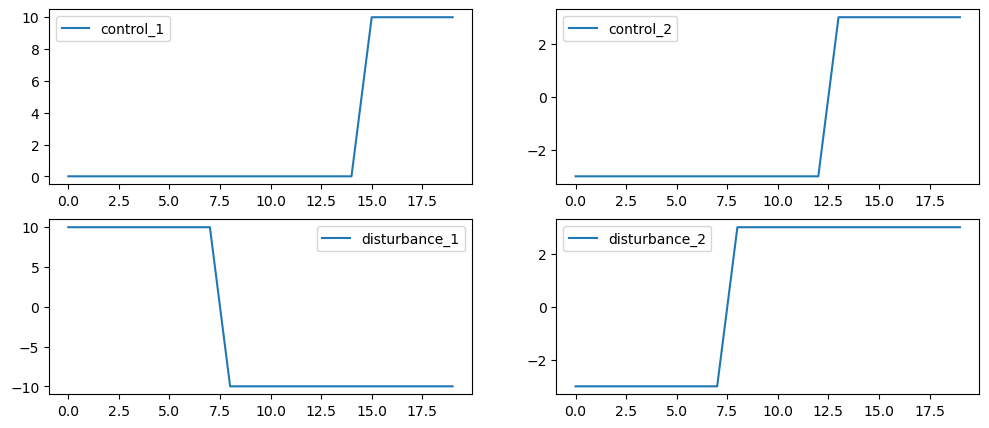

In [59]:
matrix_A = np.array([[-2, -1, 1, 0],
                     [-1, -8, 8, 0],
                     [0, 0, 0, 1],
                     [1, 5, -5, 0]])

# matrix_B = np.array([[3.5, 0],
#                      [3.9, 0],
#                      [0, 0],
#                      [0, -4]])

# matrix_C = np.array([[2, -1],
#                      [1, -4],
#                      [0, 0],
#                      [2, -5]])

# matrix_A = np.eye(4)

matrix_B = np.array([[4, -5],
                     [14, 5],
                     [-300, -240],
                     [2, 1]])

matrix_C = -np.array([[1, 9],
                     [0, -5],
                     [-6000, 4500],
                     [2, -1]])

# matrix_A = np.random.random((4, 4))

# matrix_B = np.random.random((4, 2))
# matrix_C = np.random.random((4, 2))




tk = 20
y0 = np.array([2, 3, -2, 4]) 

vector_c = np.array([-1, 3, -1, -2]) 
#vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)


function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )
values_psi = np.array([function_psi.func(t_cur) for t_cur in range(0, tk)])


function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                   v2_min= -3, v2_max=3,
                                   martirx_C=matrix_C)
values_disturbance = np.array([function_disturbance.get_disturbance(t_cur) for t_cur in range(0, tk)])

function_control = Control(function_psi, power_min=0, power_max=10,
                           sigma_min= -3, sigma_max=3,
                           matrix_B = matrix_B)
values_control = np.array([function_control.get_control(t_cur) for t_cur in range(0, tk)])


fig = plt.figure(figsize=(12,5))

fig.add_subplot(2, 2, 1)
plt.plot(np.arange(len(values_control[:, 0])), values_control[:, 0], label="control_1")
plt.legend()

fig.add_subplot(2, 2, 2)
plt.plot(np.arange(len(values_control[:, 1])), values_control[:, 1], label="control_2")
plt.legend()


fig.add_subplot(2, 2, 3)
plt.plot(np.arange(len(values_disturbance[:, 0])), values_disturbance[:, 0], label="disturbance_1")
plt.legend()

fig.add_subplot(2, 2, 4)
plt.plot(np.arange(len(values_disturbance[:, 1])), values_disturbance[:, 1], label="disturbance_2")
plt.legend()


plt.show()

In [65]:
tk = 20
z0 = np.array([0, 0, 0, 0]) 
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 6),
                                                                    np.linspace(-1, 1, 6),
                                                                    np.linspace(-1, 1, 6),
                                                                    np.linspace(-1, 1, 6))])
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=10,
                               sigma_min= -3, sigma_max=3,
                               matrix_B = matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    
control_domain = np.array(control_domain)


y0 = np.array([30, -15, -17, 10])
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                       v2_min= -3, v2_max=3,
                                       martirx_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    
disturbance_domain = np.array(disturbance_domain)

100%|██████████████████████████████████████████████████████████████████████████████| 1296/1296 [03:46<00:00,  5.72it/s]


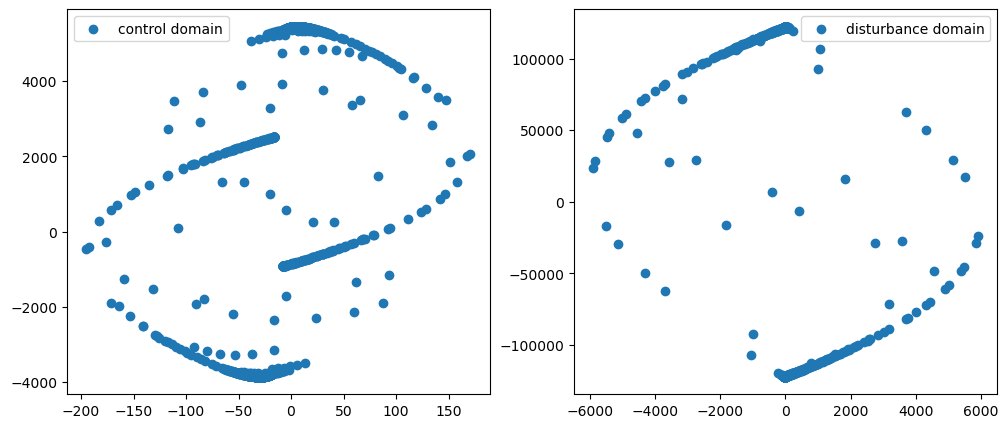

In [66]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(1, 2, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain")
plt.legend()

fig.add_subplot(1, 2, 2)
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain")
plt.legend()

plt.show()

In [69]:
print(grid_c)

[[-0.5        -0.5        -0.5        -0.5       ]
 [-0.54554473 -0.54554473 -0.54554473 -0.32732684]
 [-0.57353933 -0.57353933 -0.57353933 -0.11470787]
 ...
 [ 0.57353933  0.57353933  0.57353933  0.11470787]
 [ 0.54554473  0.54554473  0.54554473  0.32732684]
 [ 0.5         0.5         0.5         0.5       ]]


In [67]:
print(control_domain)

[[  -42.62487495 -3818.58499234 -3866.88576709   421.63481382]
 [  -37.26055989 -3844.91763283 -3885.80788605   470.80041592]
 [  -33.32816074 -3856.92921738 -3892.4136077    506.64326363]
 ...
 [    8.88468701  5442.84030271  5469.43712026 -3693.30121957]
 [   12.81708637  5430.82871427  5462.83139551 -3657.45836638]
 [   18.18140069  5404.49608221  5443.90928346 -3608.29277476]]


In [70]:
print(grid_c.shape, control_domain.shape)

(1296, 4) (1296, 4)


In [76]:
np.dot(grid_c[30], disturbance_domain[30] - control_domain[30])

-38733.78726151367

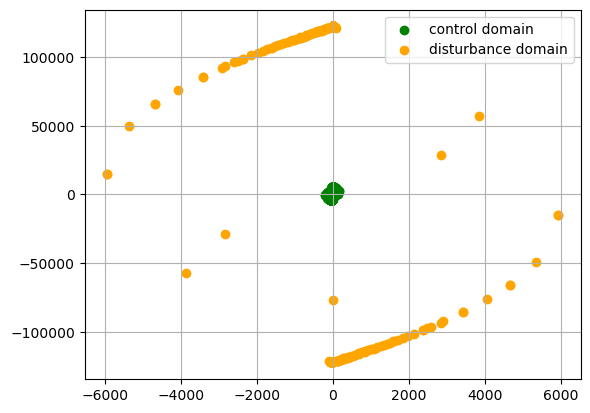

In [63]:
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange")
plt.grid()
plt.legend()
plt.show()

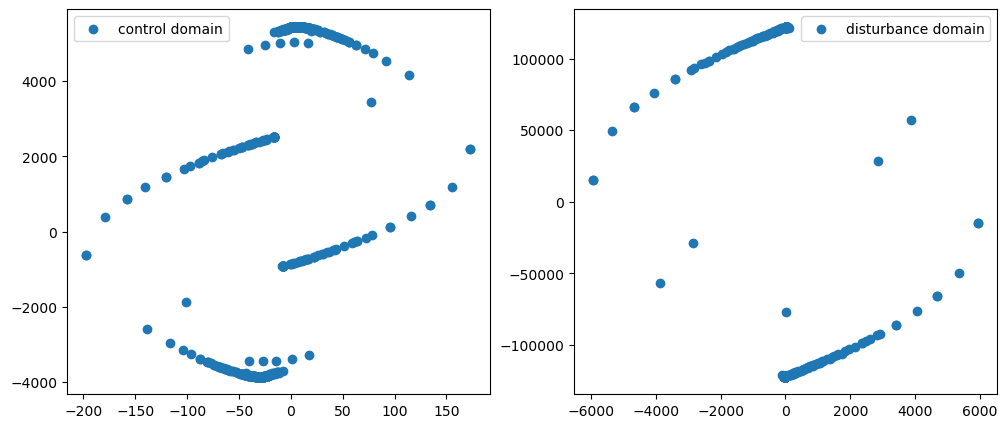

In [64]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(1, 2, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain")
plt.legend()

fig.add_subplot(1, 2, 2)
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain")
plt.legend()

plt.show()

In [22]:
# matrix_A = np.array([[7, 0],
#                      [0, 5]]) 

# #matrix_A = matrix_A / np.linalg.norm(matrix_A)

# matrix_B = np.array([[-36, 66],
#                      [3, -4]])

# #matrix_B = matrix_B / np.linalg.norm(matrix_B)


# matrix_C = np.array([[56, -42],
#                      [4, -6]])

# #matrix_C = matrix_C / np.linalg.norm(matrix_C)

In [11]:
V_prog = 300
alpha_prog = -5
theta_prog = -15
P_prog = 0
sigma_prog = 0


a11 = -rho*S*V_prog*(Cx0 + B*(Cy0**2) +2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
a12 = (P_prog*np.cos(alpha_prog) + rho*B*S*Cya*(V_prog**2)*(Cy0 + Cya*alpha_prog)) / M
a13 = -a12

a21 = (rho*S*V_prog*(Cy0 + Cya*alpha_prog) + M*g*np.cos(theta_prog) / (V_prog**2))
a22 = -(rho*S*Cya*(V_prog**2) + P_prog*np.cos(alpha_prog) / V_prog) / M
a23 = -a22

a41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog) / Jz
a42 = 0.5*rho*S*b*mza*(V_prog**2) / Jz
a43 = -a42

matrix_A = np.array([[a11, a12, a13, 0.],
              [a21, a22, a23, 0.],
              [0., 0., 0., 1.],
              [a41, a42, a43, 0.]])

b11 = np.cos(alpha_prog) / M
b21 = np.sin(alpha_prog) / (M * V_prog)
b42 = -0.5*rho*S*mzs*(V_prog**2) / Jz


matrix_B = np.array([[b11, 0.],
              [b21, 0.],
              [0., 0.],
              [0., b42]])



c11 = rho*S*V_prog*(Cx0 + B*(Cy0**2) + 2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    
c12 = rho*B*S*(V_prog**2)*Cya*(Cy0 + Cya*alpha_prog) / M

c21 = -rho*S*V_prog*(Cy0 + Cya*alpha_prog) / M

c22 = -0.5*rho*S*Cya*(V_prog**2) / M

c41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog)

c42 = -0.5*rho*b*S*mza*(V_prog**2) / Jz

matrix_C = np.array([[c11, c12],
              [c21, c22],
              [0., 0.],
              [c41, c42]])

In [18]:
print(matrix_A)
print()
print(matrix_B)
print()
print(matrix_C)

[[-2.15806933e+02 -1.29344253e+04  1.29344253e+04  0.00000000e+00]
 [-1.14590766e+05 -8.59430250e+03  8.59430250e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.80112854e+04  5.40338563e+05 -5.40338563e+05  0.00000000e+00]]

[[ 3.54577732e-04  0.00000000e+00]
 [ 3.99551781e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.64208387e+05]]

[[ 2.15806933e+02 -1.29344253e+04]
 [ 1.43238375e+02 -4.29715125e+03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.79174924e+07 -5.40338563e+05]]


In [253]:
tk = 20
y0 = np.array([0.2, -0.3]) 

vector_c = np.array([0.5, -0.5]) 
#vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)

#vector_c *= 1000

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )
values_psi = np.array([function_psi.func(t_cur) for t_cur in range(0, tk)])


function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)
values_disturbance = np.array([function_disturbance.get_disturbance(t_cur) for t_cur in range(0, tk)])

function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
values_control = np.array([function_control.get_control(t_cur) for t_cur in range(0, tk)])

# print(np.array(values_psi))
# print(np.array(values_disturbance))
# print(np.array(values_control))


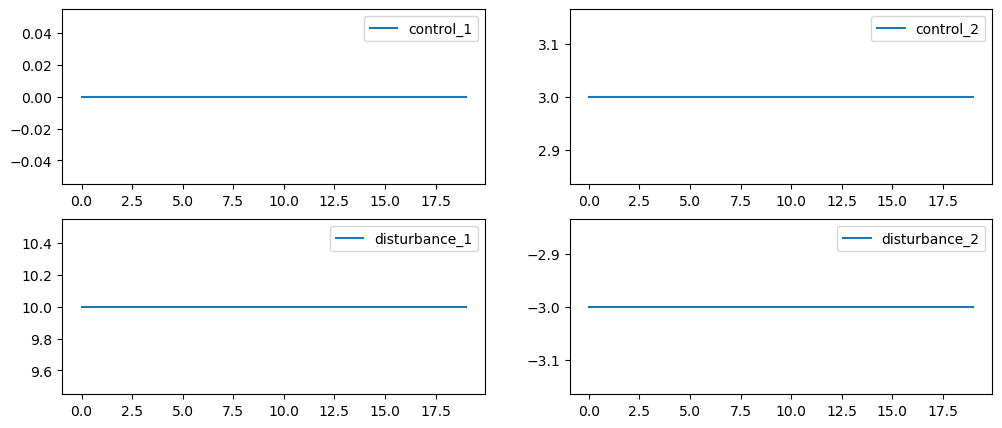

In [254]:
fig = plt.figure(figsize=(12,5))

fig.add_subplot(2, 2, 1)
plt.plot(np.arange(len(values_control[:, 0])), values_control[:, 0], label="control_1")
plt.legend()

fig.add_subplot(2, 2, 2)
plt.plot(np.arange(len(values_control[:, 1])), values_control[:, 1], label="control_2")
plt.legend()

fig.add_subplot(2, 2, 3)
plt.plot(np.arange(len(values_disturbance[:, 0])), values_disturbance[:, 0], label="disturbance_1")
plt.legend()

fig.add_subplot(2, 2, 4)
plt.plot(np.arange(len(values_disturbance[:, 1])), values_disturbance[:, 1], label="disturbance_2")
plt.legend()

plt.show()

In [255]:
tk = 20
y0 = np.array([0.2, -0.3]) #, -0.2, 0.4])

#vector_c = np.array([-1, -1, -2, -3])
vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)
y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)

In [256]:
y[-1]

array([6.21355011e+62, 3.03757285e+44])

In [257]:
tk = 20
z0 = np.array([0, 0]) #, 0, 0])

#vector_c = np.array([-1, -1, -2, -3])
vector_c = np.random.random(2)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)

In [258]:
z[-1]

array([-1.78976282e+62,  6.45148218e+43])

In [259]:
tk = 20
z0 = np.array([0, 0]) 
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 10),
                                                                    np.linspace(-1, 1, 10))])
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.16it/s]


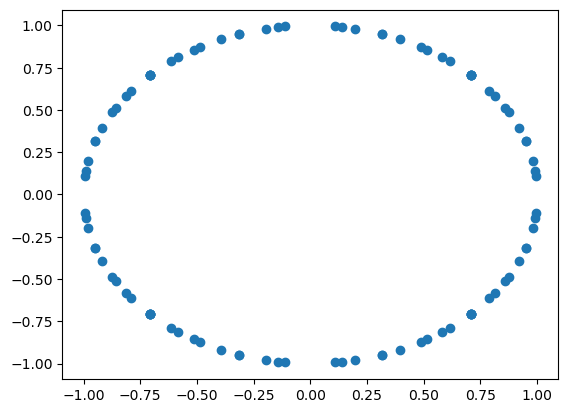

In [260]:
plt.scatter(grid_c[:, 0], grid_c[:, 1])
plt.show()

In [262]:
control_domain

array([[ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.04387687e+62, -2.25801876e+44],
       [ 5.

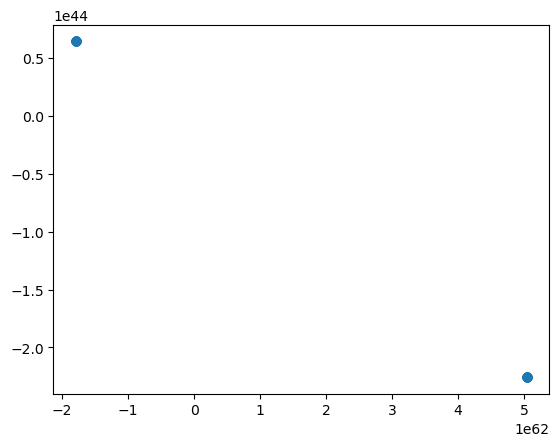

In [261]:
control_domain = np.array(control_domain)

plt.scatter(control_domain[:, 0], control_domain[:, 1])
plt.show()

In [263]:
tk = 20
y0 = np.array([5, -3])
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 20),
                                                                    np.linspace(-1, 1, 20))])
disturbance_domain = []


for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:00<00:00,  6.58it/s]


In [265]:
disturbance_domain

array([[-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.88452279e+62, -3.92465164e+44],
       [-5.

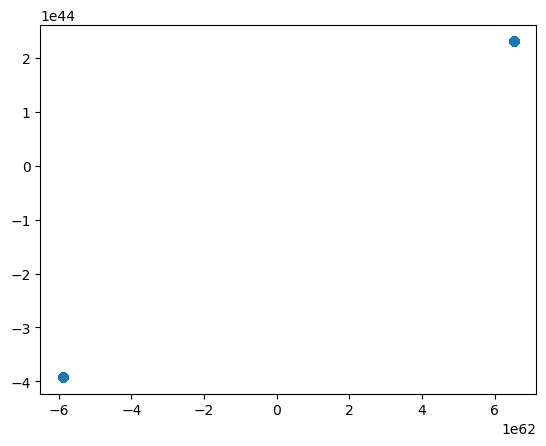

In [264]:
disturbance_domain = np.array(disturbance_domain)

plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1])
plt.show()

In [50]:
tk = 20
y0 = np.array([0.2, 0.3, -0.2, 0.4])

#vector_c = np.array([-1, -1, -2, -3])
vector_c = np.random.random(4)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)

values_disturbance = [function_disturbance.get_disturbance(t_cur) for t_cur in range(0, 20)]

function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
values_control = [function_control.get_control(t_cur) for t_cur in range(0, 20)]

print(values_disturbance)
print(values_control)

ValueError: shapes (2,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

In [50]:
tk = 20
y0 = np.array([0.2, 0.3, -0.2, 0.4])

vector_c = np.array([-1, -1, -2, -3])
#vector_c = np.random.random(4)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)
y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)

In [52]:
tk = 20
z0 = np.array([0, 0, 0, 0])

vector_c = np.array([-1, -1, -2, -3])
#vector_c = np.random.random(4)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)

In [54]:
tk = 20
z0 = np.array([0, 0, 0, 0])
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3))])
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=10, sigma_min= -3, sigma_max=3, matrix_B = matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])

C:\Users\Egor\AppData\Local\Temp\ipykernel_24956\1503548316.py:2: RuntimeWarning: invalid value encountered in divide
  grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 3),
100%|██████████████████████████████████████████████████████████████████████████████████| 81/81 [00:19<00:00,  4.11it/s]


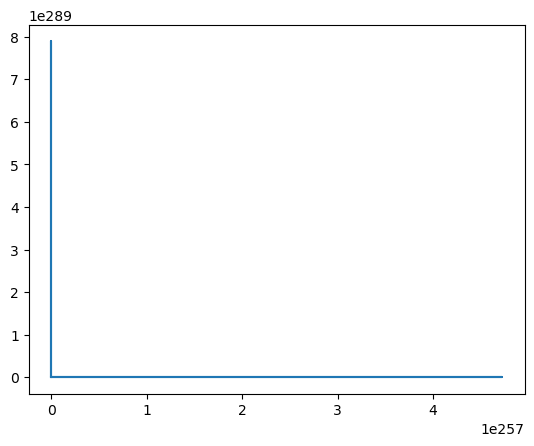

In [55]:
control_domain = np.array(control_domain)

plt.plot(control_domain[:, 0], control_domain[:, 1])
plt.show()

In [56]:
tk = 20
y0 = np.array([0.2, 0.3, -0.2, 0.4])
grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3),
                                                                    np.linspace(-1, 1, 3))])
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10, v2_min= -3, v2_max=3, martirx_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])

C:\Users\Egor\AppData\Local\Temp\ipykernel_24956\1733915706.py:3: RuntimeWarning: invalid value encountered in divide
  grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 3),
100%|██████████████████████████████████████████████████████████████████████████████████| 81/81 [00:19<00:00,  4.19it/s]


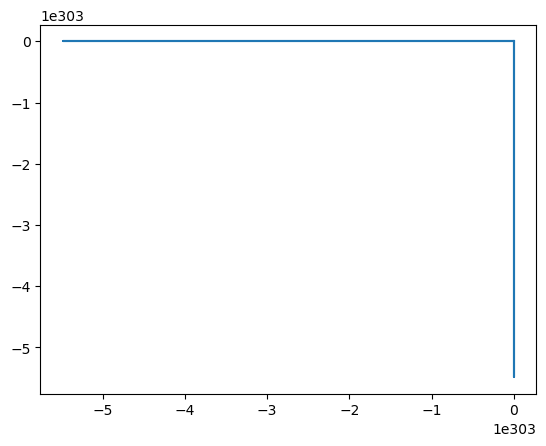

In [64]:
disturbance_domain = np.array(disturbance_domain)

plt.plot(disturbance_domain[:, 0], disturbance_domain[:, 1])
plt.show()

In [58]:
T = np.linspace(0, 20, 201)
tk = 20

vector_c = np.array([-1, -1, -2, -3])
#vector_c = np.random.random(4)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )
function_power = control_power(10, matrix_B[:, 0])
solution_power =  np.array([function_power.func(function_psi, t_cur) for t_cur in T])

In [53]:
solution_power

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10])

In [57]:
T = np.linspace(0, 20, 201)
tk = 20

vector_c = np.array([-1, -1, -2, -3])
#vector_c = np.random.random(4)
vector_c = vector_c / linalg.norm(vector_c)

function_psi = Psi(matrix_A,
                   vector_c, 
                   tk                 
                  )
function_sigma = control_sigma(sigma_min=-3, sigma_max=3, B2=matrix_B[:, 1])
solution_sigma =  np.array([function_sigma.func(function_psi, t_cur) for t_cur in T])

In [55]:
solution_sigma

array([-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,  3])

# Области достижимости для самолета

In [15]:
from scipy import linalg
import itertools
from tqdm import tqdm

In [16]:
np.random.seed(42)
def integrate_system_control(A, B, u, z0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(z, t, A, B, u):
        return A@z - B@u.get_control(t)
        # return A@z - B*u.get_control(t)
    
    z = integrate.odeint(right_side, z0, T, args=(A, B, u))
    
    return z

In [17]:
np.random.seed(42)
def integrate_system_disturbance(A, C, v, y0, tk):
    T = np.linspace(0, tk, int(tk*10))
    
    def right_side(y, t, A, C, v):
        return A@y + C@v.get_disturbance(t)
        # return A@y + C*v.get_disturbance(t)
    
    y = integrate.odeint(right_side, y0, T, args=(A, C, v))
    
    return y

In [18]:
class Psi:
    def __init__(self, A, c,
                 tk
                ):
        self.A = A
        self.c = c
        self.tk = tk
    
    def exponential_matrix(self, matrix, t):
        
        # res = linalg.expm(matrix*t)
        # res = np.eye(matrix.shape[0]) + t*matrix + 0.5*(t**2)*(matrix@matrix) + (t**3)*(matrix@matrix)@matrix/6
        
        res = np.eye(matrix.shape[0])
        factorial = 1
        matrix_power_i = matrix
        
        for i in range(1, 7):
            res += (t**i) * matrix_power_i / factorial
            matrix_power_i = matrix_power_i @ matrix
            factorial *= i+1
            
        return res
    
    def func(self, t):
        exp_mat = self.exponential_matrix(self.A.T, self.tk - t)
        
        return np.dot(exp_mat, self.c)

In [19]:
class Control:
    def __init__(self, Psi, power_min, power_max, sigma_min, sigma_max, matrix_B):
        self.Psi = Psi
        self.power_min = power_min
        self.power_max = power_max
        self.sigma_min = sigma_min
        self.sigma_max = sigma_max
        self.matrix_B = matrix_B
      
    
    def get_control(self, t):
        psi_t = self.Psi.func(t) 
        
        if psi_t@self.matrix_B[:, 0] < 0:
            power = self.power_max
        else:
            power = self.power_min
        
        if psi_t@self.matrix_B[:, 1] < 0:
            sigma = self.sigma_max
        else:
            sigma = self.sigma_min
            
        return np.array([power, sigma])

In [20]:
class Disturbance:
    def __init__(self, Psi, v1_min, v1_max, v2_min, v2_max, matrix_C):
        self.Psi = Psi
        self.v1_min = v1_min
        self.v1_max = v1_max
        self.v2_min = v2_min
        self.v2_max = v2_max
        self.matrix_C = matrix_C

    
    def get_disturbance(self, t):
        psi = self.Psi.func(t)
        
        if psi@matrix_C[:, 0] < 0:
            v1 = self.v1_max
        else:
            v1 = self.v1_min
        
        if psi@matrix_C[:, 1] < 0:
            v2 = self.v2_max
        else:
            v2 = self.v2_min
            
        return np.array([v1, v2])

In [21]:
def get_attainability_domains(tk, z0, y0, grid_c, matrix_A, matrix_B, matrix_C,
                              u1_min, u1_max, u2_min, u2_max, v1_min, v1_max, v2_min, v2_max):
    
    control_domain = []

    for vector_c in tqdm(grid_c):
        function_psi = Psi(matrix_A,
                       vector_c, 
                       tk
                      )

        function_control = Control(function_psi, power_min=u1_min, power_max=u1_max,
                                   sigma_min= u2_min, sigma_max=u2_max,
                                   matrix_B = matrix_B)
        z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
        control_domain.append(z[-1])

    control_domain = np.array(control_domain)


    disturbance_domain = []

    for vector_c in tqdm(grid_c):
        function_psi = Psi(matrix_A,
                       vector_c, 
                       tk
                      )

        function_disturbance = Disturbance(function_psi, v1_min= v1_min, v1_max=v1_max,
                                           v2_min= v2_min, v2_max=v2_max,
                                           matrix_C=matrix_C)
        y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
        disturbance_domain.append(y[-1])

    disturbance_domain = np.array(disturbance_domain)
    
    return control_domain, disturbance_domain

In [22]:
def find_minmax(control_domain, disturbance_domain):
    # поиск минимакса 

    list_y_max_distance = []
    list_max_distance = []

    for z in control_domain:

        max_distance = -np.inf
        y_max_distance = disturbance_domain[0]

        for y in disturbance_domain:
            distance = np.linalg.norm(y - z)

            if distance > max_distance:
                max_distance = distance
                y_max_distance = y

        list_y_max_distance.append(y_max_distance)
        list_max_distance.append(max_distance)

    idx_minmax = np.argmin(list_max_distance)

    minmax = list_max_distance[idx_minmax]

    saddle_point_minmax = np.array([control_domain[idx_minmax], list_y_max_distance[idx_minmax]])
    
    return minmax, saddle_point_minmax

In [23]:
def find_maxmin(control_domain, disturbance_domain):
    # поиск максимина

    list_z_min_distance = []
    list_min_distance = []

    for y in disturbance_domain:

        min_distance = np.inf
        z_min_distance = control_domain[0]

        for z in control_domain:
            distance = np.linalg.norm(y - z)

            if distance < min_distance:
                min_distance = distance
                z_min_distance = z

        list_z_min_distance.append(z_min_distance)
        list_min_distance.append(min_distance)

    idx_maxmin = np.argmax(list_min_distance)

    maxmin = list_min_distance[idx_maxmin]

    saddle_point_maxmin = np.array([list_z_min_distance[idx_maxmin], disturbance_domain[idx_maxmin]])
    
    return maxmin, saddle_point_maxmin

In [113]:
# Як - 52
# Cy0 = 4.81
# Cya = 4.81
# Cx0 = 0.0375
# B = 0.062
# S = 15
# M = 1000
# b = 1.64

# Як - 55
Cy0 = 0
Cya = 4.3
Cx0 = 0.035
B = 0.07
S = 14.805
M = 800
b = 1.746

rho = 1.2

# Jz = 1550  #!!!???
# mza = 600  #!!!???
# mzs = 900  #!!!???

g = 9.8

Jz = 5000  # Момент инерции корпуса ЛА относительно оси z (кг*м^2)
# Jz = 250
mza = 0.3
mzs = 0.7


In [60]:
# V_prog = 150 # 300
# alpha_prog = -5
# theta_prog = -15
# P_prog = 0
# sigma_prog = 0



P_star = 0
V_star = 50
alpha_star = 0
theta_star = 0


# Определение параметров самолета и условий полета
M = 1000  # Масса ЛА (кг)
S = 14.805  # Площадь поверхности крыла (кв. м)
b = 1.746  # Расстояние от ц.м. до центра давления ЛА (м)
g = 9.81  # Ускорение свободного падения (м/с^2)
Jz = 2000  # Момент инерции корпуса ЛА относительно оси z (кг*м^2)
# Jz = 250
rho = 1.225  # Плотность воздуха (кг/м^3)

# Определение аэродинамических коэффициентов
c0x = 0.035
c0y = 0
c_alpha_y = 4.3
B = 0.07
m_alpha_z = 1500
m_sigma_z = 2300


V_prog = 50 # 300
alpha_prog = -0.2
theta_prog = -0.3
P_prog = 0
sigma_prog = 0



# Як - 55
Cy0 = 0
Cya = 4.3
Cx0 = 0.035
B = 0.07

rho = 1.2
S = 14.805
M = 1000
b = 1.746


Jz = 2000
mza = 1500
mzs = 2300

g = 9.8


a11 = -rho*S*V_prog*(Cx0 + B*(Cy0**2) +2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
a12 = (P_prog*np.cos(alpha_prog) + rho*B*S*Cya*(V_prog**2)*(Cy0 + Cya*alpha_prog)) / M
a13 = -a12

a21 = (rho*S*V_prog*(Cy0 + Cya*alpha_prog) + M*g*np.cos(theta_prog) / (V_prog**2))
a22 = -(rho*S*Cya*(V_prog**2) + P_prog*np.cos(alpha_prog) / V_prog) / M
a23 = -a22

a41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog) / Jz
a42 = 0.5*rho*S*b*mza*(V_prog**2) / Jz
a43 = -a42

matrix_A = np.array([[a11, a12, a13, 0.],
              [a21, a22, a23, 0.],
              [0., 0., 0., 1.],
              [a41, a42, a43, 0.]])

b11 = np.cos(alpha_prog) / M
b21 = np.sin(alpha_prog) / (M * V_prog)
b42 = -0.5*rho*S*mzs*(V_prog**2) / Jz


matrix_B = np.array([[b11, 0.],
              [b21, 0.],
              [0., 0.],
              [0., b42]])



c11 = rho*S*V_prog*(Cx0 + B*(Cy0**2) + 2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    
c12 = rho*B*S*(V_prog**2)*Cya*(Cy0 + Cya*alpha_prog) / M

c21 = -rho*S*V_prog*(Cy0 + Cya*alpha_prog) / M

c22 = -0.5*rho*S*Cya*(V_prog**2) / M

c41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog)

c42 = -0.5*rho*b*S*mza*(V_prog**2) / Jz

matrix_C = np.array([[c11, c12],
              [c21, c22],
              [0., 0.],
              [c41, c42]])

In [61]:
print(f"matrix_A = {matrix_A}")
print(f"matrix_B = {matrix_B}")
print(f"matrix_C = {matrix_C}")

matrix_A = [[-7.70795676e-02 -1.14972669e+01  1.14972669e+01  0.00000000e+00]
 [-7.60193081e+02 -1.90984500e+02  1.90984500e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.32645770e+02  2.90807212e+04 -2.90807212e+04  0.00000000e+00]]
matrix_B = [[ 9.80066578e-04  0.00000000e+00]
 [-3.97338662e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.55386250e+04]]
matrix_C = [[ 7.70795676e-02 -1.14972669e+01]
 [ 7.63938000e-01 -9.54922500e+01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 4.65291540e+05 -2.90807212e+04]]


### поиск всевозможных возмущений

In [62]:
tk = 20
z0 = np.array([0, 0, 0, 0])
y0 = np.array([5, -3, -7, 4])#*100

grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4))])    

list_diff_disturbance = []
list_diff_trajectories_disturbance = []
list_diff_vector_c_disturbance = []
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                       v2_min= -3, v2_max=3,
                                       matrix_C=matrix_C)
    values_disturbance = [function_disturbance.get_disturbance(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_disturbance not in list_diff_disturbance:
        list_diff_disturbance.append(values_disturbance)
        list_diff_vector_c_disturbance.append(vector_c)
    
    
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    y = y.tolist()
    if y not in list_diff_trajectories_disturbance:
        list_diff_trajectories_disturbance.append(y)
    

disturbance_domain = np.array(disturbance_domain)
list_diff_disturbance = np.array(list_diff_disturbance)
list_diff_trajectories_disturbance = np.array(list_diff_trajectories_disturbance)
list_diff_vector_c_disturbance = np.array(list_diff_vector_c_disturbance)
# print(len(list_diff_disturbance))


list_diff_control = []
list_diff_trajectories_control = []
list_diff_vector_c_control = []
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=15, sigma_min= -5, sigma_max=5,
                                       matrix_B=matrix_B)
    values_control = [function_control.get_control(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_control not in list_diff_control:
        list_diff_control.append(values_control)
        list_diff_vector_c_control.append(vector_c)
    
    
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    z = z.tolist()
    if z not in list_diff_trajectories_control:
        list_diff_trajectories_control.append(z)
    

control_domain = np.array(control_domain)
list_diff_control = np.array(list_diff_control)
list_diff_trajectories_control = np.array(list_diff_trajectories_control)
list_diff_vector_c_control = np.array(list_diff_vector_c_control)
# print(len(list_diff_control))

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:30<00:00,  8.29it/s]


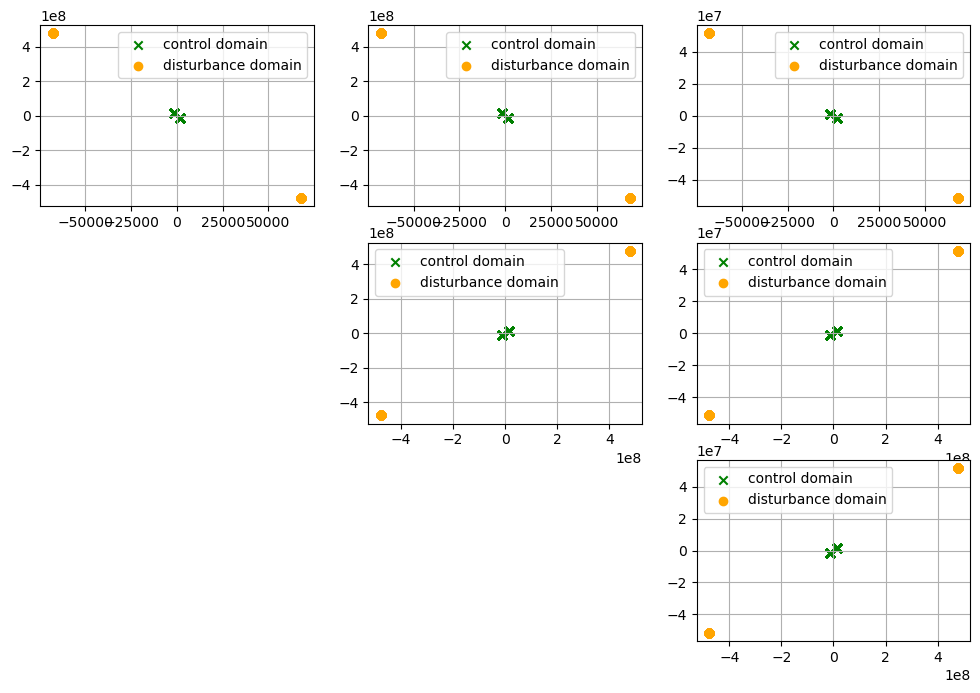

In [63]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(3, 3, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 2)
plt.scatter(control_domain[:, 0], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 3)
plt.scatter(control_domain[:, 0], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 5)
plt.scatter(control_domain[:, 1], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 6)
plt.scatter(control_domain[:, 1], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 9)
plt.scatter(control_domain[:, 2], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 2], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()
plt.show()

In [93]:
tk = 5
z0 = np.array([0, 0, 0, 0])
y0 = np.array([5, -3, -7, 4])#*100

grid_c = np.array([x / np.linalg.norm(x) for x in itertools.product(np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4),
                                                                    np.linspace(-1, 1, 4))])    

list_diff_disturbance = []
list_diff_trajectories_disturbance = []
list_diff_vector_c_disturbance = []
disturbance_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_disturbance = Disturbance(function_psi, v1_min= -10, v1_max=10,
                                       v2_min= -3, v2_max=3,
                                       matrix_C=matrix_C)
    values_disturbance = [function_disturbance.get_disturbance(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_disturbance not in list_diff_disturbance:
        list_diff_disturbance.append(values_disturbance)
        list_diff_vector_c_disturbance.append(vector_c)
    
    
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)
    disturbance_domain.append(y[-1])
    y = y.tolist()
    if y not in list_diff_trajectories_disturbance:
        list_diff_trajectories_disturbance.append(y)
    

disturbance_domain = np.array(disturbance_domain)
list_diff_disturbance = np.array(list_diff_disturbance)
list_diff_trajectories_disturbance = np.array(list_diff_trajectories_disturbance)
list_diff_vector_c_disturbance = np.array(list_diff_vector_c_disturbance)
# print(len(list_diff_disturbance))


list_diff_control = []
list_diff_trajectories_control = []
list_diff_vector_c_control = []
control_domain = []

for vector_c in tqdm(grid_c):
    function_psi = Psi(matrix_A,
                   vector_c, 
                   tk
                  )

    function_control = Control(function_psi, power_min=0, power_max=15, sigma_min= -5, sigma_max=5,
                                       matrix_B=matrix_B)
    values_control = [function_control.get_control(t_cur).tolist() for t_cur in np.linspace(0, tk, int(tk*10))]

    if values_control not in list_diff_control:
        list_diff_control.append(values_control)
        list_diff_vector_c_control.append(vector_c)
    
    
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)
    control_domain.append(z[-1])
    z = z.tolist()
    if z not in list_diff_trajectories_control:
        list_diff_trajectories_control.append(z)
    

control_domain = np.array(control_domain)
list_diff_control = np.array(list_diff_control)
list_diff_trajectories_control = np.array(list_diff_trajectories_control)
list_diff_vector_c_control = np.array(list_diff_vector_c_control)
# print(len(list_diff_control))

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:26<00:00,  9.76it/s]


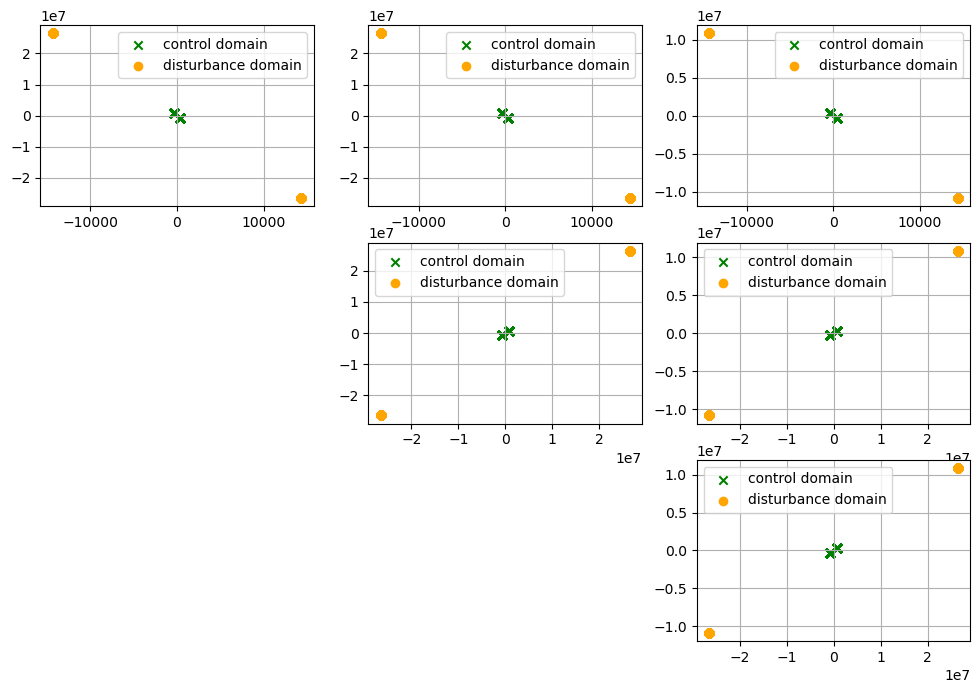

In [94]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(3, 3, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 2)
plt.scatter(control_domain[:, 0], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 3)
plt.scatter(control_domain[:, 0], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 5)
plt.scatter(control_domain[:, 1], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 6)
plt.scatter(control_domain[:, 1], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()

fig.add_subplot(3, 3, 9)
plt.scatter(control_domain[:, 2], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 2], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")
plt.grid()
plt.legend()
plt.show()

In [95]:
minmax, saddle_point_minmax = find_minmax(control_domain, disturbance_domain)
maxmin, saddle_point_maxmin = find_maxmin(control_domain, disturbance_domain)

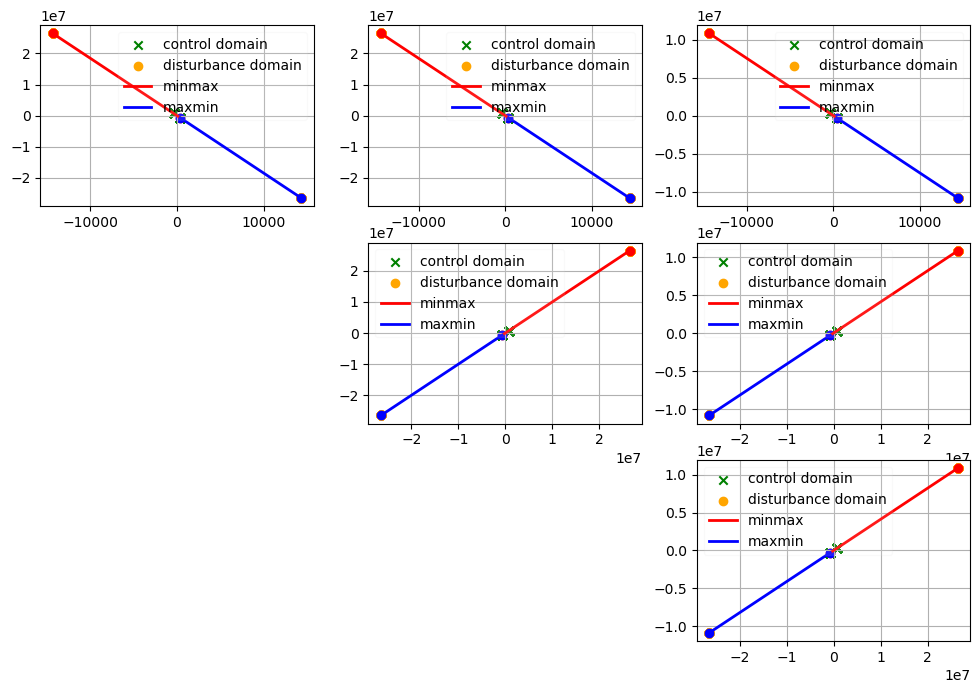

In [96]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(3, 3, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][1], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][1], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][1], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][1], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 2)
plt.scatter(control_domain[:, 0], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][2], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][2], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][2], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][2], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)




fig.add_subplot(3, 3, 3)
plt.scatter(control_domain[:, 0], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 5)
plt.scatter(control_domain[:, 1], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][1], saddle_point_minmax[0][2], color="red")
plt.scatter(saddle_point_minmax[1][1], saddle_point_minmax[1][2], color="red")
plt.plot([saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         [saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][1], saddle_point_maxmin[0][2], color="blue")
plt.scatter(saddle_point_maxmin[1][1], saddle_point_maxmin[1][2], color="blue")
plt.plot([saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         [saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 6)
plt.scatter(control_domain[:, 1], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][1], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][1], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][1], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][1], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 9)
plt.scatter(control_domain[:, 2], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 2], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][2], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][2], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][2], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][2], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)


plt.show()

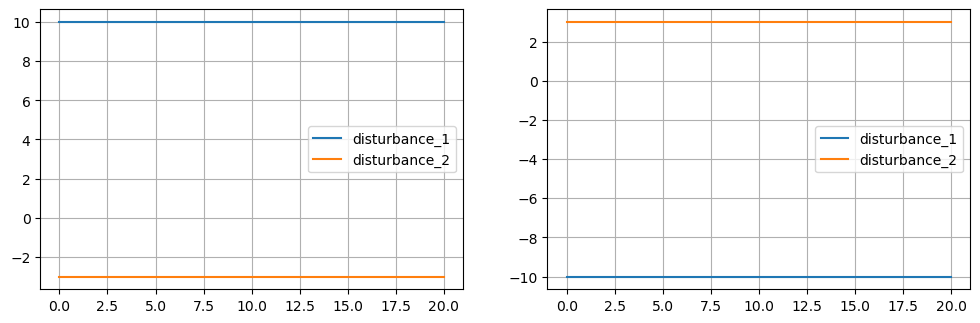

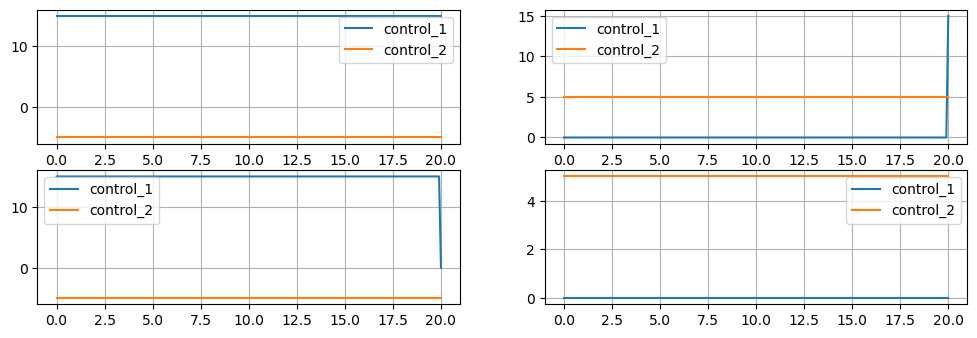

In [64]:
fig = plt.figure(figsize=(12, 8))
n_disturbances = len(list_diff_disturbance)

for i in range(n_disturbances):
    fig.add_subplot(n_disturbances, 2, i+1)
    plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_disturbance[i][:, 0], label="disturbance_1")
    plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_disturbance[i][:, 1], label="disturbance_2")
    plt.grid()
    plt.legend()
    
plt.show()


fig = plt.figure(figsize=(12, 8))
n_control = len(list_diff_control)

for i in range(n_control):
    fig.add_subplot(n_control, 2, i+1)
    plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_control[i][:, 0], label="control_1")
    plt.plot(np.linspace(0, tk, int(tk*10)), list_diff_control[i][:, 1], label="control_2")
    plt.grid()
    plt.legend()
    
plt.show()

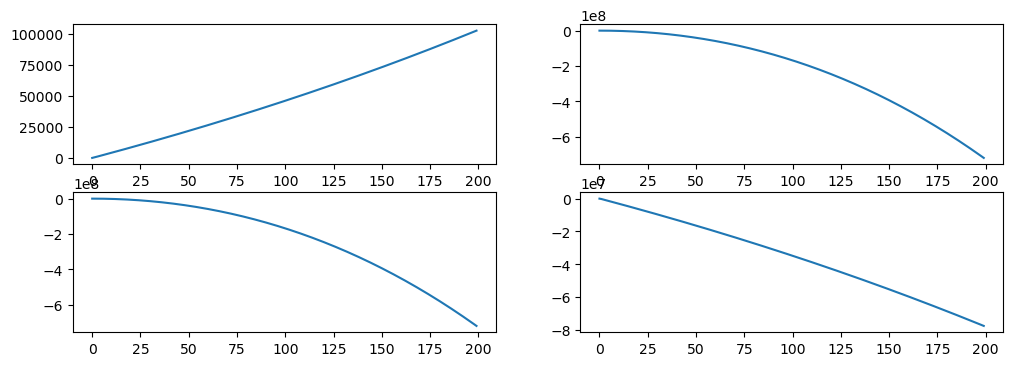

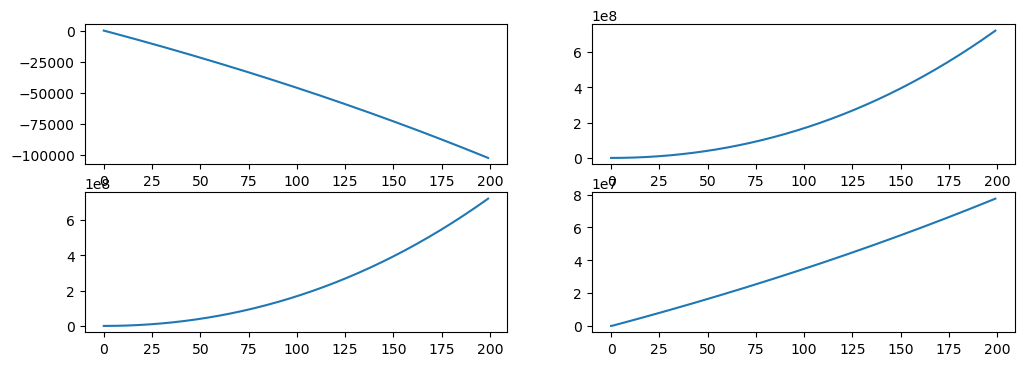

In [65]:
tk = 20
y0 = np.array([5, -3, -7, 4])
for vector_c in list_diff_vector_c_disturbance:
    function_psi = Psi(matrix_A, vector_c, tk)
    function_disturbance = Disturbance(function_psi, v1_min=-15, v1_max=15, v2_min=-5, v2_max=5, matrix_C=matrix_C)
    y = integrate_system_disturbance(matrix_A, matrix_C, function_disturbance, y0, tk)


    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(2, 2, 1)
    plt.plot(np.arange(len(y)), y[:, 0], label='coordinate_1')

    fig.add_subplot(2, 2, 2)
    plt.plot(np.arange(len(y)), y[:, 1], label='coordinate_2')

    fig.add_subplot(2, 2, 3)
    plt.plot(np.arange(len(y)), y[:, 2], label='coordinate_3')

    fig.add_subplot(2, 2, 4)
    plt.plot(np.arange(len(y)), y[:, 3], label='coordinate_4')

    plt.show()

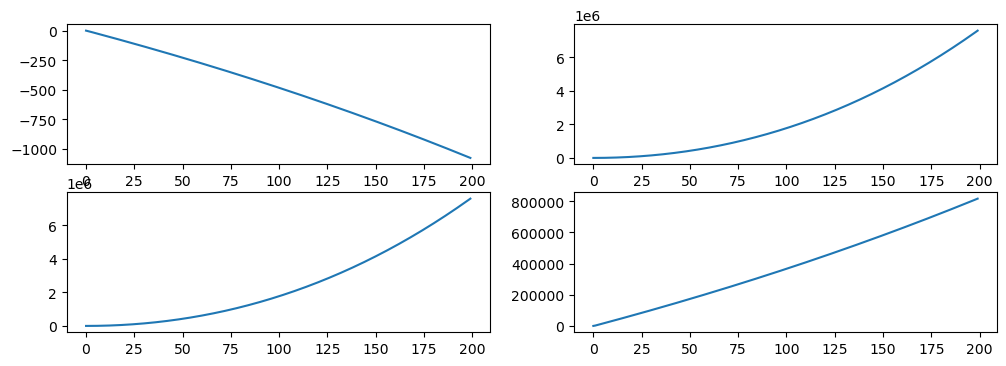

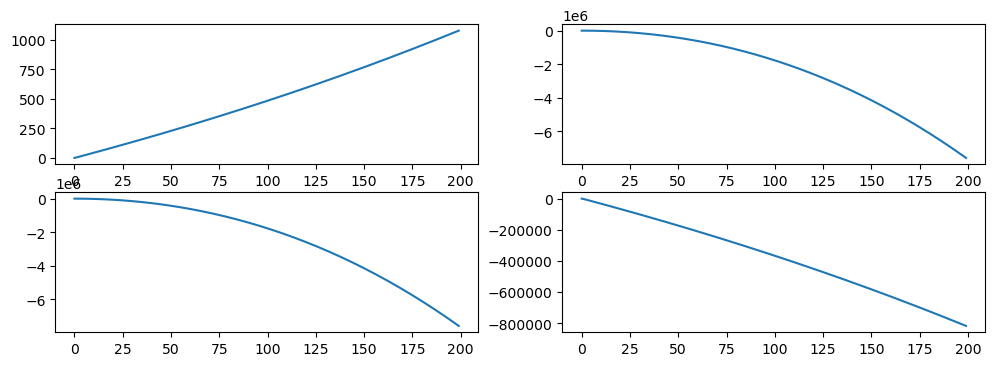

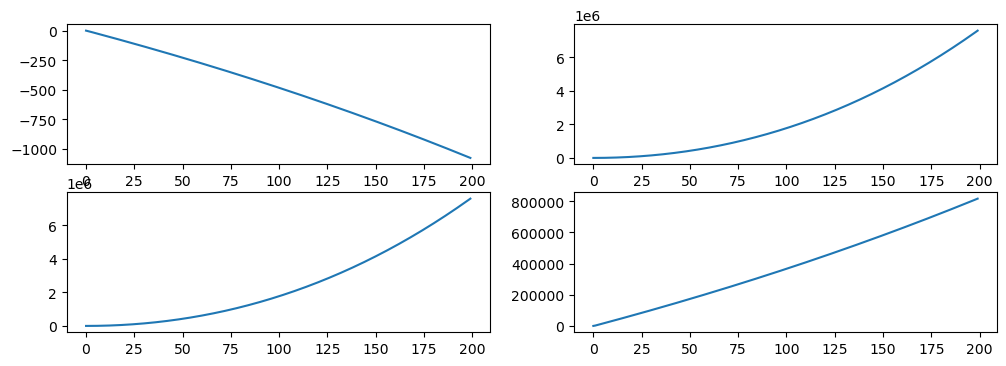

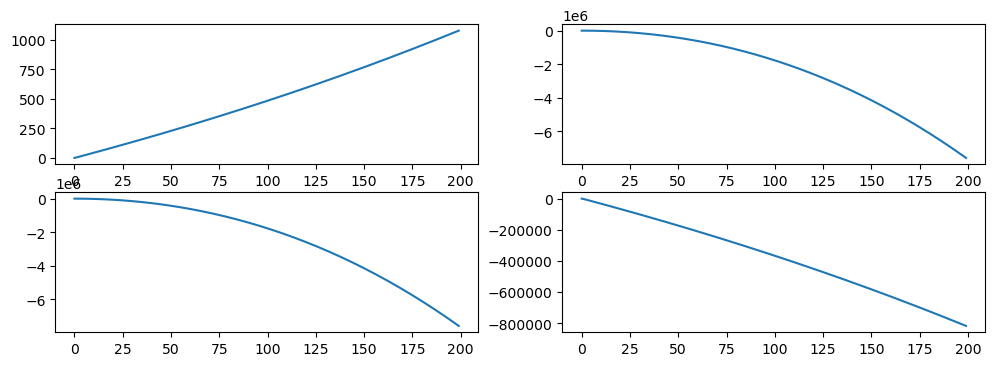

In [66]:
tk = 20
y0 = np.array([5, -3, -7, 4])
for vector_c in list_diff_vector_c_control:
    function_psi = Psi(matrix_A, vector_c, tk)
    function_control = Control(function_psi, power_min=0, power_max=10, sigma_min=-3, sigma_max=3, matrix_B=matrix_B)
    z = integrate_system_control(matrix_A, matrix_B, function_control, z0, tk)


    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(2, 2, 1)
    plt.plot(np.arange(len(z)), z[:, 0], label='coordinate_1')

    fig.add_subplot(2, 2, 2)
    plt.plot(np.arange(len(z)), z[:, 1], label='coordinate_2')

    fig.add_subplot(2, 2, 3)
    plt.plot(np.arange(len(z)), z[:, 2], label='coordinate_3')

    fig.add_subplot(2, 2, 4)
    plt.plot(np.arange(len(z)), z[:, 3], label='coordinate_4')

    plt.show()

In [67]:
minmax, saddle_point_minmax = find_minmax(control_domain, disturbance_domain)
maxmin, saddle_point_maxmin = find_maxmin(control_domain, disturbance_domain)

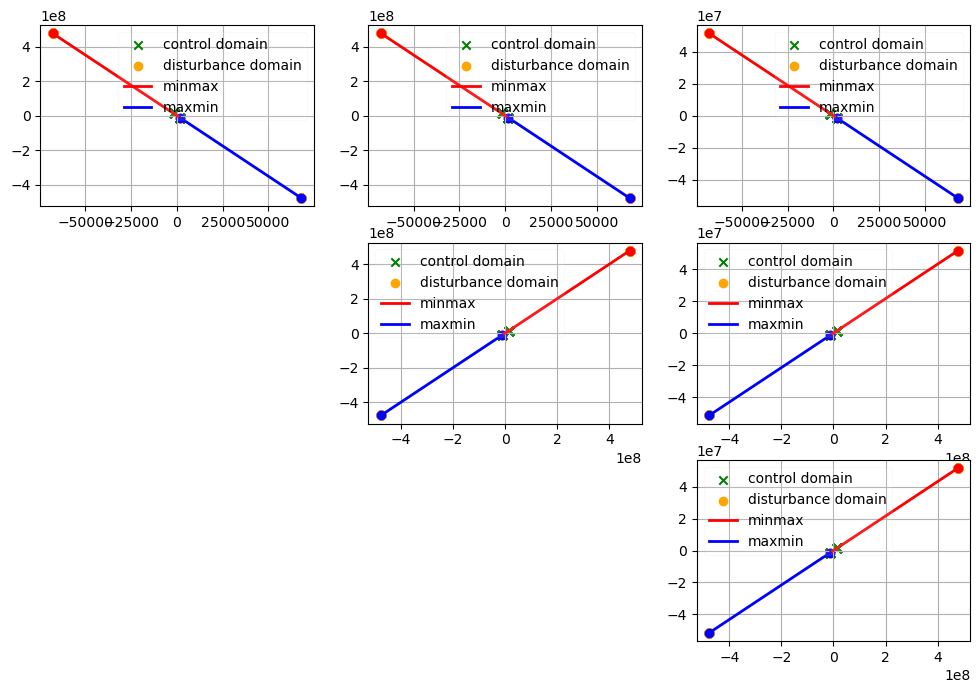

In [92]:
fig = plt.figure(figsize=(12, 8))

fig.add_subplot(3, 3, 1)
plt.scatter(control_domain[:, 0], control_domain[:, 1], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 1], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][1], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][1], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][1], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][1], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 2)
plt.scatter(control_domain[:, 0], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][2], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][2], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][2], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][2], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)




fig.add_subplot(3, 3, 3)
plt.scatter(control_domain[:, 0], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 0], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][0], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][0], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][0], saddle_point_minmax[1][0]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][0], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][0], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][0], saddle_point_maxmin[1][0]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 5)
plt.scatter(control_domain[:, 1], control_domain[:, 2], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 2], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][1], saddle_point_minmax[0][2], color="red")
plt.scatter(saddle_point_minmax[1][1], saddle_point_minmax[1][2], color="red")
plt.plot([saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         [saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][1], saddle_point_maxmin[0][2], color="blue")
plt.scatter(saddle_point_maxmin[1][1], saddle_point_maxmin[1][2], color="blue")
plt.plot([saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         [saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 6)
plt.scatter(control_domain[:, 1], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 1], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][1], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][1], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][1], saddle_point_minmax[1][1]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][1], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][1], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][1], saddle_point_maxmin[1][1]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)



fig.add_subplot(3, 3, 9)
plt.scatter(control_domain[:, 2], control_domain[:, 3], label="control domain", color="green", marker="x")
plt.scatter(disturbance_domain[:, 2], disturbance_domain[:, 3], label="disturbance domain", color="orange", marker="o")

plt.scatter(saddle_point_minmax[0][2], saddle_point_minmax[0][3], color="red")
plt.scatter(saddle_point_minmax[1][2], saddle_point_minmax[1][3], color="red")
plt.plot([saddle_point_minmax[0][2], saddle_point_minmax[1][2]],
         [saddle_point_minmax[0][3], saddle_point_minmax[1][3]],
         color="red", label="minmax", linewidth=2)

plt.scatter(saddle_point_maxmin[0][2], saddle_point_maxmin[0][3], color="blue")
plt.scatter(saddle_point_maxmin[1][2], saddle_point_maxmin[1][3], color="blue")
plt.plot([saddle_point_maxmin[0][2], saddle_point_maxmin[1][2]],
         [saddle_point_maxmin[0][3], saddle_point_maxmin[1][3]],
         color="blue", label="maxmin", linewidth=2)

plt.grid()
plt.legend(framealpha=0.1)


plt.show()

# Метод условного градиента

In [14]:
def system_control_decomposition(z, t, u, V_prog, alpha_prog, theta_prog, P_prog, sigma_prog,
             Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g):
    """
    dz/dt = Az - Bu
    """
    
    a11 = -rho*S*V_prog*(Cx0 + B*(Cy0**2) +2*B*Cy0*Cya*alpha_prog + B*(Cya**2)*(alpha_prog**2)) / M
    a12 = (P_prog*np.cos(alpha_prog) + rho*B*S*Cya*(V_prog**2)*(Cy0 + Cya*alpha_prog)) / M
    a13 = -a12
    
    a21 = (rho*S*V_prog*(Cy0 + Cya*alpha_prog) + M*g*np.cos(theta_prog) / (V_prog**2))
    a22 = -(rho*S*Cya*(V_prog**2) + P_prog*np.cos(alpha_prog) / V_prog) / M
    a23 = -a22
    
    a41 = -rho*b*S*V_prog*(mza*alpha_prog + mzs*sigma_prog) / Jz
    a42 = 0.5*rho*S*b*mza*(V_prog**2) / Jz
    a43 = -a42
    
    matrix_A = np.array([[a11, a12, a13, 0.],
                  [a21, a22, a23, 0.],
                  [0., 0., 0., 1.],
                  [a41, a42, a43, 0.]])
    
    
    
    b11 = np.cos(alpha_prog) / M
    b21 = np.sin(alpha_prog) / (M * V_prog)
    b42 = -0.5*rho*S*mzs*(V_prog**2) / Jz
    
    
    matrix_B = np.array([[b11, 0.],
                  [b21, 0.],
                  [0., 0.],
                  [0., b42]])
    
    #u = control(t)
    
    return matrix_A@z - matrix_B@u

In [39]:
# # определение множества допустимых управлений
# U = [x for x in itertools.product(np.linspace(0, 50, 51), np.linspace(-10, 10, 21))]

In [38]:
def J(u, grad=False):
    t = np.linspace(0, tk, tk*10)
    z = integrate.odeint(system_control_decomposition, z0, t,
        args=(u, V_prog, alpha_prog, theta_prog, P_prog, sigma_prog,
             Cy0, Cya, Cx0, B, rho, S, M, b, Jz, mza, mzs, g)
        )
    if grad:
        return np.array([2*ui for ui in u]) # 2*z[-1]
    
    return np.dot(z[-1], z[-1])

def find_u_help(U, J):
    u_min = U[0]
    grad_J_u_help_min = J(u_min, grad=True)@u_min
    for u in U:
        grad_J_u_help  = J(u, grad=True)@u
        if grad_J_u_help < grad_J_u_help_min:
            u_min = u
            grad_J_u_help_min = grad_J_u_help
    
    return u_min

In [44]:
max_iter = 10
eps = 1e-6

U = [np.array(x) for x in itertools.product(np.linspace(0, 50, 51), np.linspace(-10, 10, 21))]
idx = np.random.choice(len(U))
u0 = U[idx]

print(f"u0 = {u0}, index in U = {idx}")

z0 = np.array([30, 2, 3, 1])
tk = 20

u_prev = u0
i = 0


while True: #(i < max_iter) and (np.linalg.norm(J(u_prev)) > eps):
    print(f"i = {i}")
    print(f"np.linalg.norm(J(u_prev)) = {np.linalg.norm(J(u_prev))}")
    
    grad_J = J(u_prev, grad=True)
    print(f"grad_J = {grad_J}")
    
    u_help = find_u_help(U, J)
    
    print(f"u_help = {u_help}")
    alpha = 1
    while J(u_prev + alpha*(u_help - u_prev)) > J(u_prev):
        alpha = 0.5*alpha
    
    print(f"u_prev = {u_prev}")
    u_next = u_prev + alpha*(u_help - u_prev)
    print(f"u_next = {u_next}")
    
    u_prev = u_next
    i += 1
    
    if i > max_iter or np.linalg.norm(J(u_prev)) < eps:
        break
print("===================")
print(f"u_opt = { u_prev}")


u0 = [ 8. -2.], index in U = 176
i = 0
np.linalg.norm(J(u_prev)) = inf
grad_J = [16. -4.]
u_help = [0. 0.]
u_prev = [ 8. -2.]
u_next = [ 4. -1.]
i = 1
np.linalg.norm(J(u_prev)) = 4.794065100674285e+136
grad_J = [ 8. -2.]
u_help = [0. 0.]
u_prev = [ 4. -1.]
u_next = [0. 0.]
u_opt = [0. 0.]
